# Data Sources

Common data sources for predictive maintenance problems are :

* **Failure history:** The failure history of a machine or component within the machine.
* **Maintenance history:** The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
* **Machine conditions and usage:** The operating conditions of a machine e.g. data collected from sensors.
* **Machine features:** The features of a machine, e.g. engine size, make and model, location.
* **Operator features:** The features of the operator, e.g. gender, past experience
The data for this example comes from 4 different sources which are real-time telemetry data collected from machines, error messages, historical maintenance records that include failures and machine information such as type and age.

In [ ]:
!git clone https://github.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy.git

Cloning into 'Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd

telemetry = pd.read_csv('/content/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/data/PdM_telemetry.csv')
errors = pd.read_csv('/content/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/data/PdM_errors.csv')
maint = pd.read_csv('/content/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/data/PdM_maint.csv')
failures = pd.read_csv('/content/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/data/PdM_failures.csv')
machines = pd.read_csv('/content/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/data/PdM_machines.csv')

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  vibration
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511


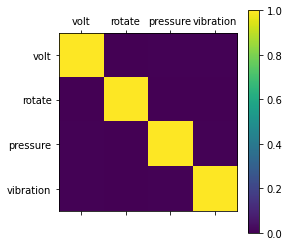

In [ ]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()


# select the value columns in the DataFrame to compare
cor_cols = ['volt', 'rotate', 'pressure', 'vibration']

# plot correlation matrix

plt.matshow(telemetry.loc[:, cor_cols].corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()


#### **Telemetry**
The first data source is the telemetry time-series data which consists of **voltage, rotation, pressure, and vibration** measurements collected from 100 machines in **real time averaged over every hour collected during the year 2015**. Below, we display the first 10 records in the dataset. A summary of the whole dataset is also provided.

Text(0.5, 0, 'Date')

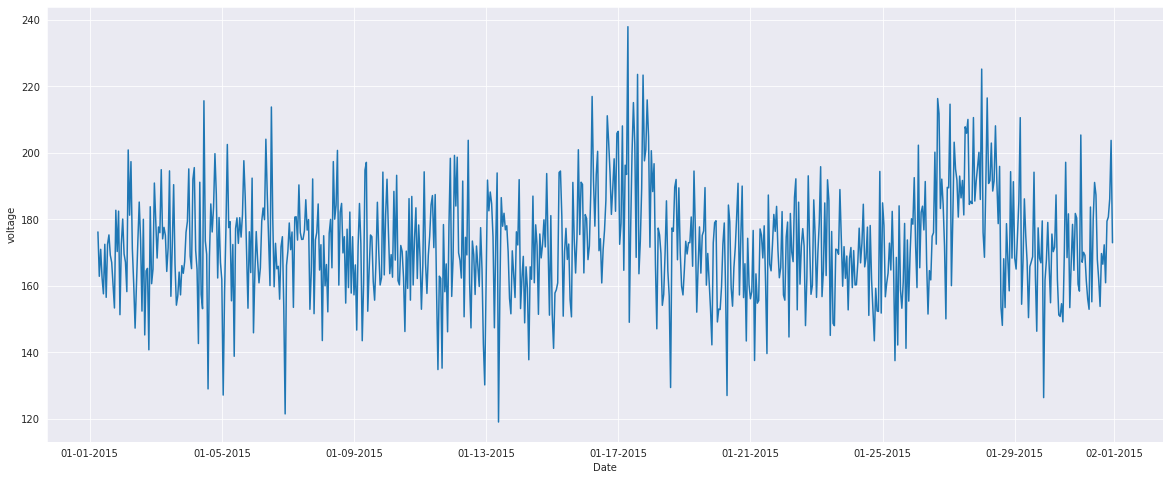

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

#### **Errors**
The second major data source is the error logs. These are **non-breaking errors thrown while the machine is still operational and do not constitute as failures.** The **error date and times** are rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [ ]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

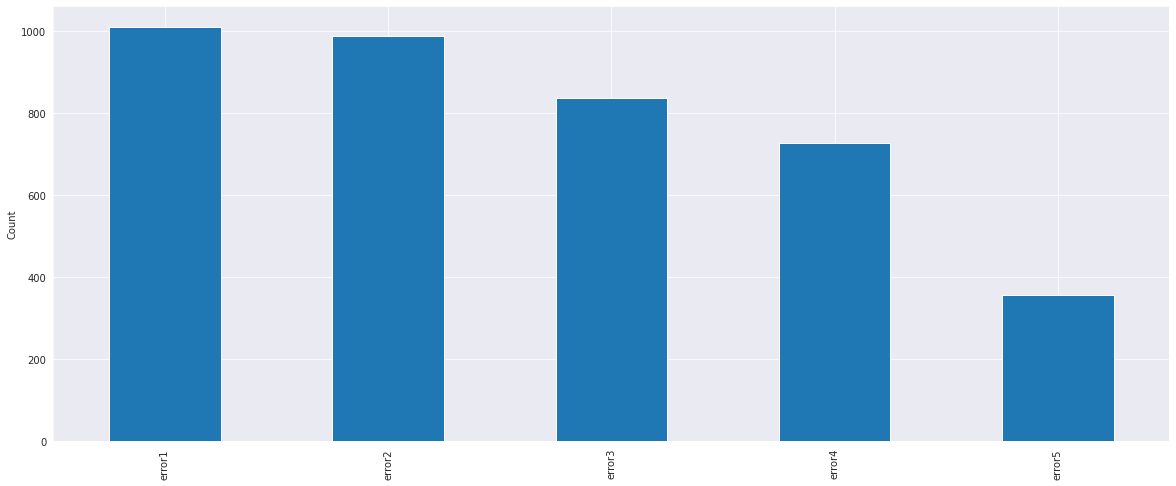

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

#### **Maintenance**
These are the **scheduled and unscheduled** maintenance records which correspond to both **regular inspection of components as well as failures.** A **record is generated if a component is replaced during the scheduled inspection or replaced due to a breakdown.** The **records that are created due to breakdowns will be called failures** which is explained in the later sections. Maintenance data has both 2014 and 2015 records.

In [ ]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

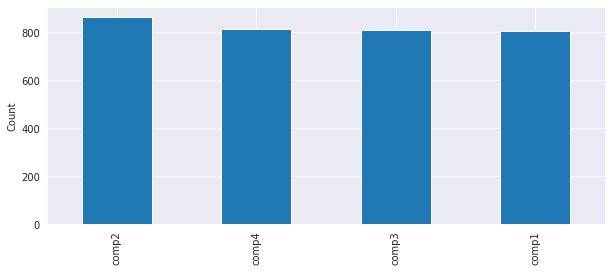

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()

#### **Machines**
This data set includes some information about the machines: model type and age (years in service).

In [ ]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


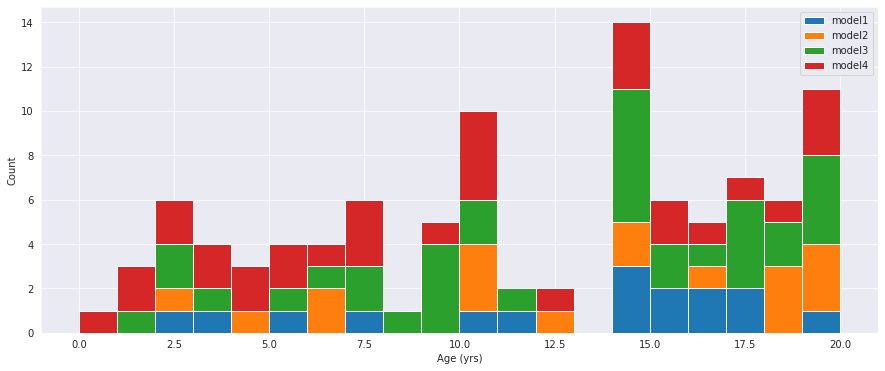

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

#### **Failures**
These are the records of component replacements **due to failures.** Each record has a **date and time, machine ID, and failed component type.**

In [ ]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

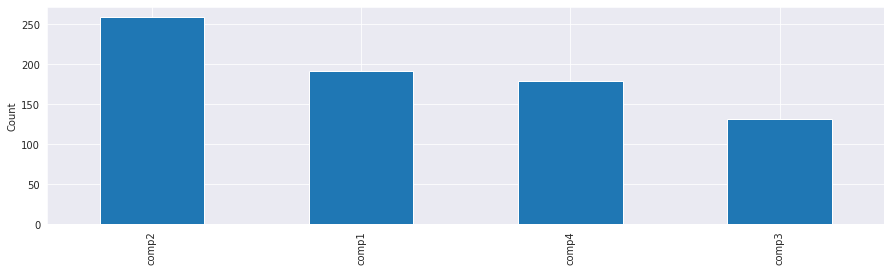

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
failures['failure'].value_counts()

## Feature Engineering
The first step in predictive maintenance applications is feature engineering which requires bringing the different data sources together to create features that best describe a machines's health condition at a given point in time. In the next sections, several feature engineering methods are used to create features based on the properties of each data source.

### Lag Features from Telemetry
Telemetry data almost always comes with time-stamps which makes it suitable for calculating lagging features. A common method is to pick a window size for the lag features to be created and compute rolling aggregate measures such as mean, standard deviation, minimum, maximum, etc. to represent the short term history of the telemetry over the lag window. In the following, rolling mean and standard deviation of the telemetry data over the last 3 hour lag window is calculated for every 3 hours.

In [ ]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)
telemetry_mean_3h

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542
...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630


In [ ]:
from datetime import datetime 
from datetime import timedelta

maintdata = maint.drop(columns = ['comp'])
refdata2 = maintdata['datetime'] < '2015-01-01'
ids = set(maintdata['machineID'])
#maintdata['datetime']
print(maintdata[refdata2])

timedata = pd.to_datetime(failures['datetime'])
newtime = pd.DataFrame()
for j in ids:
  cond = failures['machineID'] == j
  d = timedata[cond]
  newdf = pd.DataFrame(d)
  #print(timedata[cond])
  #print(refdata[j+1])
  #newtime= newtime.append({'datetime' : refdata[j+1], 'machineID' : int(j+1)}, ignore_index= True)
  
  newtime= newtime.append({'datetime' : '2015-01-01 06:00:00', 'machineID' : int(j)}, ignore_index= True)
  newtime= newtime.append(newdf, ignore_index= True)
  newtime= newtime.append({'datetime' : '2016-01-01 07:00:00', 'machineID' : int(j)}, ignore_index= True)
  

#print(newtime[newtime['datetime']< datetime.strptime('2016-01-01 06:00:00', '%Y-%m-%d %H:%M:%S' )])
#newtime.to_csv(r'/content/mixfailure.csv')


#failures['datetime'].loc[0] = '2015-01-01 09:00:00'
#timedata = pd.to_datetime(failures['datetime'])

newtime['datetime'] =  pd.to_datetime(newtime['datetime'], format="%Y-%m-%d %H:%M:%S")
#print(newtime[newtime['datetime']<'2016-01-01 06:00:00' ])   
print(newtime)     

id = 1 
data = []   
extradate  = 0
for i in range(len(newtime)):
  l = []

  #mid = failures['machineID'].loc[i]
  #print(newtime['machineID'])
  mid = newtime['machineID'].loc[i]
  if(i+1<len(newtime)):
    
    x= str(newtime['datetime'].loc[i+1] - newtime['datetime'].loc[i])
    y = x.split()
    t = y[2].split(':')

              
    if(newtime['datetime'].loc[i+1] > newtime['datetime'].loc[i]):
      #print(int(y[0])*24 + int(t[0]) + (int(t[1])/60))
      dif = int(y[0])*24 + int(t[0]) + (int(t[1])/60) + (int(t[2])/3600)
      daten = newtime['datetime'].loc[i]
    else:
      mid += 1

    if(newtime['datetime'].loc[i+1] > newtime['datetime'].loc[i]):  
      
      data.append([daten, mid, int(dif)])
            
columns = ['datetime', 'machineID','MTBF']     
df = pd.DataFrame(data, columns = columns) 
  
# print dataframe. 

df = df.fillna(method = 'ffill')

print(df) 
df.to_csv(r'/content/MTBF.csv')  



                datetime  machineID
0    2014-06-01 06:00:00          1
1    2014-07-16 06:00:00          1
2    2014-07-31 06:00:00          1
3    2014-12-13 06:00:00          1
37   2014-06-16 06:00:00          2
...                  ...        ...
3227 2014-12-28 06:00:00         99
3258 2014-08-30 06:00:00        100
3259 2014-09-14 06:00:00        100
3260 2014-11-28 06:00:00        100
3261 2014-12-13 06:00:00        100

[400 rows x 2 columns]
               datetime  machineID
0   2015-01-01 06:00:00        1.0
1   2015-01-05 06:00:00        NaN
2   2015-03-06 06:00:00        NaN
3   2015-04-20 06:00:00        NaN
4   2015-06-19 06:00:00        NaN
..                  ...        ...
956 2015-01-01 06:00:00      100.0
957 2015-02-12 06:00:00        NaN
958 2015-09-10 06:00:00        NaN
959 2015-12-09 06:00:00        NaN
960 2016-01-01 07:00:00      100.0

[961 rows x 2 columns]
               datetime  machineID  MTBF
0   2015-01-01 06:00:00        1.0    96
1   2015-01-05 06:

In [ ]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S")
x = telemetry[['datetime', 'machineID']].merge(df, on=['datetime','machineID'], how='left')
x.to_csv(r'/content/mixsensor.csv')
print(x)

                  datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1   NaN
2      2015-01-01 08:00:00          1   NaN
3      2015-01-01 09:00:00          1   NaN
4      2015-01-01 10:00:00          1   NaN
...                    ...        ...   ...
876095 2016-01-01 02:00:00        100   NaN
876096 2016-01-01 03:00:00        100   NaN
876097 2016-01-01 04:00:00        100   NaN
876098 2016-01-01 05:00:00        100   NaN
876099 2016-01-01 06:00:00        100   NaN

[876100 rows x 3 columns]


In [ ]:
import datetime
begin_time = datetime.datetime.now()
import numpy as np
mtbf = pd.DataFrame(x)

ids = set(mtbf['machineID'])

print(ids)


def rulcreate(q1):
  k = 0
  for j in range(len(q1)+1):
   
    if(j+1<len(q1)):
      mem = q1['MTBF'].loc[j+1]
      if(q1['MTBF'].loc[j] == mem):
        
        q1['MTBF'].loc[j] = q1['MTBF'].loc[j] - k
        k+=1

        if(q1['MTBF'].loc[j]==0):
          q1['MTBF'].loc[j] = q1['MTBF'].loc[j+1]
          k = 1

        
      else:
        q1['MTBF'].loc[j] = q1['MTBF'].loc[j] - k
        
        k = 0 
    
        
  q1['MTBF'].loc[len(q1)-1] = 1

    

  return(q1) 

#mtbf = mtbf.fillna(0)
mtbf = mtbf.ffill()

finaldata = pd.DataFrame()

for id in ids:
  indexlist = []

  q1 = mtbf.query('machineID == ' + str(id))

  newdf = pd.DataFrame(q1)
  newdf.index = list(range(len(q1)))


  x1 = rulcreate(newdf)
  print(x1)

  finaldata = finaldata.append(rulcreate(newdf), ignore_index = True)
  print('==>', finaldata)


  
  
   
    
'''     

  #print(mtbf[cond2])

cond2 = mtbf['machineID'] == 1
k = 0
for j in range(len(mtbf[cond2])+1):
  
  mem = mtbf['MTBF'].loc[j+1]
  if(mtbf['MTBF'].loc[j] == mem):
    mtbf['MTBF'].loc[j] = mtbf['MTBF'].loc[j] - k
    k+=1
  else:
    mtbf['MTBF'].loc[j] = mtbf['MTBF'].loc[j] - k
    #mtbf['MTBF'].loc[j] = mem
    k = 0    
print(mtbf[cond2])
mtbf[cond2].to_csv(r'/content/FINALMTBF_all.csv')
''' 
print(finaldata)
finaldata.to_csv(r'/content/FINALMTBF_all.csv')
#print(type(x['MTBF'].loc[0]))

print(datetime.datetime.now() - begin_time)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00          1  96.0
1    2015-01-01 07:00:00          1  95.0
2    2015-01-01 08:00:00          1  94.0
3    2015-01-01 09:00:00          1  93.0
4    2015-01-01 10:00:00          1  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00          1   5.0
8757 2016-01-01 03:00:00          1   4.0
8758 2016-01-01 04:00:00          1   3.0
8759 2016-01-01 05:00:00          1   2.0
8760 2016-01-01 06:00:00          1   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                 datetime  machineID  MTBF
0    2015-01-01 06:00:00          1  96.0
1    2015-01-01 07:00:00          1  95.0
2    2015-01-01 08:00:00          1  94.0
3    2015-01-01 09:00:00          1  93.0
4    2015-01-01 10:00:00          1  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00          1   5.0
8757 2016-01-01 03:00:00          1   4.0
8758 2016-01-01 04:00:00          1   3.0
8759 2016-01-01 05:00:00          1   2.0
8760 2016-01-01 06:00:00          1   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00          2  1848.0
1    2015-01-01 07:00:00          2  1847.0
2    2015-01-01 08:00:00          2  1846.0
3    2015-01-01 09:00:00          2  1845.0
4    2015-01-01 10:00:00          2  1844.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00          2     5.0
8757 2016-01-01 03:00:00          2     4.0
8758 2016-01-01 04:00:00          2     3.0
8759 2016-01-01 05:00:00          2     2.0
8760 2016-01-01 06:00:00          2     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
17517 2016-01-01 02:00:00          2   5.0
17518 2016-01-01 03:00:00          2   4.0
17519 2016-01-01 04:00:00          2   3.0
17520 2016-01-01 05:00:00          2   2.0
17521 2016-01-01 06:00:00          2   1.0

[17522 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00          3  144.0
1    2015-01-01 07:00:00          3  143.0
2    2015-01-01 08:00:00          3  142.0
3    2015-01-01 09:00:00          3  141.0
4    2015-01-01 10:00:00          3  140.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00          3    5.0
8757 2016-01-01 03:00:00          3    4.0
8758 2016-01-01 04:00:00          3    3.0
8759 2016-01-01 05:00:00          3    2.0
8760 2016-01-01 06:00:00          3    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
26278 2016-01-01 02:00:00          3   5.0
26279 2016-01-01 03:00:00          3   4.0
26280 2016-01-01 04:00:00          3   3.0
26281 2016-01-01 05:00:00          3   2.0
26282 2016-01-01 06:00:00          3   1.0

[26283 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00          4  384.0
1    2015-01-01 07:00:00          4  383.0
2    2015-01-01 08:00:00          4  382.0
3    2015-01-01 09:00:00          4  381.0
4    2015-01-01 10:00:00          4  380.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00          4    5.0
8757 2016-01-01 03:00:00          4    4.0
8758 2016-01-01 04:00:00          4    3.0
8759 2016-01-01 05:00:00          4    2.0
8760 2016-01-01 06:00:00          4    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
35039 2016-01-01 02:00:00          4   5.0
35040 2016-01-01 03:00:00          4   4.0
35041 2016-01-01 04:00:00          4   3.0
35042 2016-01-01 05:00:00          4   2.0
35043 2016-01-01 06:00:00          4   1.0

[35044 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00          5  192.0
1    2015-01-01 07:00:00          5  191.0
2    2015-01-01 08:00:00          5  190.0
3    2015-01-01 09:00:00          5  189.0
4    2015-01-01 10:00:00          5  188.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00          5    5.0
8757 2016-01-01 03:00:00          5    4.0
8758 2016-01-01 04:00:00          5    3.0
8759 2016-01-01 05:00:00          5    2.0
8760 2016-01-01 06:00:00          5    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
43800 2016-01-01 02:00:00          5   5.0
43801 2016-01-01 03:00:00          5   4.0
43802 2016-01-01 04:00:00          5   3.0
43803 2016-01-01 05:00:00          5   2.0
43804 2016-01-01 06:00:00          5   1.0

[43805 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00          6  8761.0
1    2015-01-01 07:00:00          6  8760.0
2    2015-01-01 08:00:00          6  8759.0
3    2015-01-01 09:00:00          6  8758.0
4    2015-01-01 10:00:00          6  8757.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00          6     5.0
8757 2016-01-01 03:00:00          6     4.0
8758 2016-01-01 04:00:00          6     3.0
8759 2016-01-01 05:00:00          6     2.0
8760 2016-01-01 06:00:00          6     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
52561 2016-01-01 02:00:00          6   5.0
52562 2016-01-01 03:00:00          6   4.0
52563 2016-01-01 04:00:00          6   3.0
52564 2016-01-01 05:00:00          6   2.0
52565 2016-01-01 06:00:00          6   1.0

[52566 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00          7  552.0
1    2015-01-01 07:00:00          7  551.0
2    2015-01-01 08:00:00          7  550.0
3    2015-01-01 09:00:00          7  549.0
4    2015-01-01 10:00:00          7  548.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00          7    5.0
8757 2016-01-01 03:00:00          7    4.0
8758 2016-01-01 04:00:00          7    3.0
8759 2016-01-01 05:00:00          7    2.0
8760 2016-01-01 06:00:00          7    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
61322 2016-01-01 02:00:00          7   5.0
61323 2016-01-01 03:00:00          7   4.0
61324 2016-01-01 04:00:00          7   3.0
61325 2016-01-01 05:00:00          7   2.0
61326 2016-01-01 06:00:00          7   1.0

[61327 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00          8  1560.0
1    2015-01-01 07:00:00          8  1559.0
2    2015-01-01 08:00:00          8  1558.0
3    2015-01-01 09:00:00          8  1557.0
4    2015-01-01 10:00:00          8  1556.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00          8     5.0
8757 2016-01-01 03:00:00          8     4.0
8758 2016-01-01 04:00:00          8     3.0
8759 2016-01-01 05:00:00          8     2.0
8760 2016-01-01 06:00:00          8     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
70083 2016-01-01 02:00:00          8   5.0
70084 2016-01-01 03:00:00          8   4.0
70085 2016-01-01 04:00:00          8   3.0
70086 2016-01-01 05:00:00          8   2.0
70087 2016-01-01 06:00:00          8   1.0

[70088 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00          9  1488.0
1    2015-01-01 07:00:00          9  1487.0
2    2015-01-01 08:00:00          9  1486.0
3    2015-01-01 09:00:00          9  1485.0
4    2015-01-01 10:00:00          9  1484.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00          9     5.0
8757 2016-01-01 03:00:00          9     4.0
8758 2016-01-01 04:00:00          9     3.0
8759 2016-01-01 05:00:00          9     2.0
8760 2016-01-01 06:00:00          9     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
78844 2016-01-01 02:00:00          9   5.0
78845 2016-01-01 03:00:00          9   4.0
78846 2016-01-01 04:00:00          9   3.0
78847 2016-01-01 05:00:00          9   2.0
78848 2016-01-01 06:00:00          9   1.0

[78849 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         10  432.0
1    2015-01-01 07:00:00         10  431.0
2    2015-01-01 08:00:00         10  430.0
3    2015-01-01 09:00:00         10  429.0
4    2015-01-01 10:00:00         10  428.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         10    5.0
8757 2016-01-01 03:00:00         10    4.0
8758 2016-01-01 04:00:00         10    3.0
8759 2016-01-01 05:00:00         10    2.0
8760 2016-01-01 06:00:00         10    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
87605 2016-01-01 02:00:00         10   5.0
87606 2016-01-01 03:00:00         10   4.0
87607 2016-01-01 04:00:00         10   3.0
87608 2016-01-01 05:00:00         10   2.0
87609 2016-01-01 06:00:00         10   1.0

[87610 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         11  456.0
1    2015-01-01 07:00:00         11  455.0
2    2015-01-01 08:00:00         11  454.0
3    2015-01-01 09:00:00         11  453.0
4    2015-01-01 10:00:00         11  452.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         11    5.0
8757 2016-01-01 03:00:00         11    4.0
8758 2016-01-01 04:00:00         11    3.0
8759 2016-01-01 05:00:00         11    2.0
8760 2016-01-01 06:00:00         11    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                  datetime  machineID  MTBF
0     2015-01-01 06:00:00          1  96.0
1     2015-01-01 07:00:00          1  95.0
2     2015-01-01 08:00:00          1  94.0
3     2015-01-01 09:00:00          1  93.0
4     2015-01-01 10:00:00          1  92.0
...                   ...        ...   ...
96366 2016-01-01 02:00:00         11   5.0
96367 2016-01-01 03:00:00         11   4.0
96368 2016-01-01 04:00:00         11   3.0
96369 2016-01-01 05:00:00         11   2.0
96370 2016-01-01 06:00:00         11   1.0

[96371 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         12  144.0
1    2015-01-01 07:00:00         12  143.0
2    2015-01-01 08:00:00         12  142.0
3    2015-01-01 09:00:00         12  141.0
4    2015-01-01 10:00:00         12  140.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         12    5.0
8757 2016-01-01 03:00:00         12    4.0
8758 2016-01-01 04:00:00         12    3.0
8759 2016-01-01 05:00:00         12    2.0
8760 2016-01-01 06:00:00         12    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
105127 2016-01-01 02:00:00         12   5.0
105128 2016-01-01 03:00:00         12   4.0
105129 2016-01-01 04:00:00         12   3.0
105130 2016-01-01 05:00:00         12   2.0
105131 2016-01-01 06:00:00         12   1.0

[105132 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         13  2400.0
1    2015-01-01 07:00:00         13  2399.0
2    2015-01-01 08:00:00         13  2398.0
3    2015-01-01 09:00:00         13  2397.0
4    2015-01-01 10:00:00         13  2396.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         13     5.0
8757 2016-01-01 03:00:00         13     4.0
8758 2016-01-01 04:00:00         13     3.0
8759 2016-01-01 05:00:00         13     2.0
8760 2016-01-01 06:00:00         13     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
113888 2016-01-01 02:00:00         13   5.0
113889 2016-01-01 03:00:00         13   4.0
113890 2016-01-01 04:00:00         13   3.0
113891 2016-01-01 05:00:00         13   2.0
113892 2016-01-01 06:00:00         13   1.0

[113893 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         14  720.0
1    2015-01-01 07:00:00         14  719.0
2    2015-01-01 08:00:00         14  718.0
3    2015-01-01 09:00:00         14  717.0
4    2015-01-01 10:00:00         14  716.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         14    5.0
8757 2016-01-01 03:00:00         14    4.0
8758 2016-01-01 04:00:00         14    3.0
8759 2016-01-01 05:00:00         14    2.0
8760 2016-01-01 06:00:00         14    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
122649 2016-01-01 02:00:00         14   5.0
122650 2016-01-01 03:00:00         14   4.0
122651 2016-01-01 04:00:00         14   3.0
122652 2016-01-01 05:00:00         14   2.0
122653 2016-01-01 06:00:00         14   1.0

[122654 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         15  456.0
1    2015-01-01 07:00:00         15  455.0
2    2015-01-01 08:00:00         15  454.0
3    2015-01-01 09:00:00         15  453.0
4    2015-01-01 10:00:00         15  452.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         15    5.0
8757 2016-01-01 03:00:00         15    4.0
8758 2016-01-01 04:00:00         15    3.0
8759 2016-01-01 05:00:00         15    2.0
8760 2016-01-01 06:00:00         15    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
131410 2016-01-01 02:00:00         15   5.0
131411 2016-01-01 03:00:00         15   4.0
131412 2016-01-01 04:00:00         15   3.0
131413 2016-01-01 05:00:00         15   2.0
131414 2016-01-01 06:00:00         15   1.0

[131415 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         16  21.0
1    2015-01-01 07:00:00         16  20.0
2    2015-01-01 08:00:00         16  19.0
3    2015-01-01 09:00:00         16  18.0
4    2015-01-01 10:00:00         16  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         16   5.0
8757 2016-01-01 03:00:00         16   4.0
8758 2016-01-01 04:00:00         16   3.0
8759 2016-01-01 05:00:00         16   2.0
8760 2016-01-01 06:00:00         16   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
140171 2016-01-01 02:00:00         16   5.0
140172 2016-01-01 03:00:00         16   4.0
140173 2016-01-01 04:00:00         16   3.0
140174 2016-01-01 05:00:00         16   2.0
140175 2016-01-01 06:00:00         16   1.0

[140176 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         17  21.0
1    2015-01-01 07:00:00         17  20.0
2    2015-01-01 08:00:00         17  19.0
3    2015-01-01 09:00:00         17  18.0
4    2015-01-01 10:00:00         17  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         17   5.0
8757 2016-01-01 03:00:00         17   4.0
8758 2016-01-01 04:00:00         17   3.0
8759 2016-01-01 05:00:00         17   2.0
8760 2016-01-01 06:00:00         17   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
148932 2016-01-01 02:00:00         17   5.0
148933 2016-01-01 03:00:00         17   4.0
148934 2016-01-01 04:00:00         17   3.0
148935 2016-01-01 05:00:00         17   2.0
148936 2016-01-01 06:00:00         17   1.0

[148937 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         18  696.0
1    2015-01-01 07:00:00         18  695.0
2    2015-01-01 08:00:00         18  694.0
3    2015-01-01 09:00:00         18  693.0
4    2015-01-01 10:00:00         18  692.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         18    5.0
8757 2016-01-01 03:00:00         18    4.0
8758 2016-01-01 04:00:00         18    3.0
8759 2016-01-01 05:00:00         18    2.0
8760 2016-01-01 06:00:00         18    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
157693 2016-01-01 02:00:00         18   5.0
157694 2016-01-01 03:00:00         18   4.0
157695 2016-01-01 04:00:00         18   3.0
157696 2016-01-01 05:00:00         18   2.0
157697 2016-01-01 06:00:00         18   1.0

[157698 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         19  288.0
1    2015-01-01 07:00:00         19  287.0
2    2015-01-01 08:00:00         19  286.0
3    2015-01-01 09:00:00         19  285.0
4    2015-01-01 10:00:00         19  284.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         19    5.0
8757 2016-01-01 03:00:00         19    4.0
8758 2016-01-01 04:00:00         19    3.0
8759 2016-01-01 05:00:00         19    2.0
8760 2016-01-01 06:00:00         19    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
166454 2016-01-01 02:00:00         19   5.0
166455 2016-01-01 03:00:00         19   4.0
166456 2016-01-01 04:00:00         19   3.0
166457 2016-01-01 05:00:00         19   2.0
166458 2016-01-01 06:00:00         19   1.0

[166459 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         20  72.0
1    2015-01-01 07:00:00         20  71.0
2    2015-01-01 08:00:00         20  70.0
3    2015-01-01 09:00:00         20  69.0
4    2015-01-01 10:00:00         20  68.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         20   5.0
8757 2016-01-01 03:00:00         20   4.0
8758 2016-01-01 04:00:00         20   3.0
8759 2016-01-01 05:00:00         20   2.0
8760 2016-01-01 06:00:00         20   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
175215 2016-01-01 02:00:00         20   5.0
175216 2016-01-01 03:00:00         20   4.0
175217 2016-01-01 04:00:00         20   3.0
175218 2016-01-01 05:00:00         20   2.0
175219 2016-01-01 06:00:00         20   1.0

[175220 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         21  528.0
1    2015-01-01 07:00:00         21  527.0
2    2015-01-01 08:00:00         21  526.0
3    2015-01-01 09:00:00         21  525.0
4    2015-01-01 10:00:00         21  524.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         21    5.0
8757 2016-01-01 03:00:00         21    4.0
8758 2016-01-01 04:00:00         21    3.0
8759 2016-01-01 05:00:00         21    2.0
8760 2016-01-01 06:00:00         21    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
183976 2016-01-01 02:00:00         21   5.0
183977 2016-01-01 03:00:00         21   4.0
183978 2016-01-01 04:00:00         21   3.0
183979 2016-01-01 05:00:00         21   2.0
183980 2016-01-01 06:00:00         21   1.0

[183981 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         22  21.0
1    2015-01-01 07:00:00         22  20.0
2    2015-01-01 08:00:00         22  19.0
3    2015-01-01 09:00:00         22  18.0
4    2015-01-01 10:00:00         22  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         22   5.0
8757 2016-01-01 03:00:00         22   4.0
8758 2016-01-01 04:00:00         22   3.0
8759 2016-01-01 05:00:00         22   2.0
8760 2016-01-01 06:00:00         22   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
192737 2016-01-01 02:00:00         22   5.0
192738 2016-01-01 03:00:00         22   4.0
192739 2016-01-01 04:00:00         22   3.0
192740 2016-01-01 05:00:00         22   2.0
192741 2016-01-01 06:00:00         22   1.0

[192742 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         23  96.0
1    2015-01-01 07:00:00         23  95.0
2    2015-01-01 08:00:00         23  94.0
3    2015-01-01 09:00:00         23  93.0
4    2015-01-01 10:00:00         23  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         23   5.0
8757 2016-01-01 03:00:00         23   4.0
8758 2016-01-01 04:00:00         23   3.0
8759 2016-01-01 05:00:00         23   2.0
8760 2016-01-01 06:00:00         23   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
201498 2016-01-01 02:00:00         23   5.0
201499 2016-01-01 03:00:00         23   4.0
201500 2016-01-01 04:00:00         23   3.0
201501 2016-01-01 05:00:00         23   2.0
201502 2016-01-01 06:00:00         23   1.0

[201503 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         24  24.0
1    2015-01-01 07:00:00         24  23.0
2    2015-01-01 08:00:00         24  22.0
3    2015-01-01 09:00:00         24  21.0
4    2015-01-01 10:00:00         24  20.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         24   5.0
8757 2016-01-01 03:00:00         24   4.0
8758 2016-01-01 04:00:00         24   3.0
8759 2016-01-01 05:00:00         24   2.0
8760 2016-01-01 06:00:00         24   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
210259 2016-01-01 02:00:00         24   5.0
210260 2016-01-01 03:00:00         24   4.0
210261 2016-01-01 04:00:00         24   3.0
210262 2016-01-01 05:00:00         24   2.0
210263 2016-01-01 06:00:00         24   1.0

[210264 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         25  1512.0
1    2015-01-01 07:00:00         25  1511.0
2    2015-01-01 08:00:00         25  1510.0
3    2015-01-01 09:00:00         25  1509.0
4    2015-01-01 10:00:00         25  1508.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         25     5.0
8757 2016-01-01 03:00:00         25     4.0
8758 2016-01-01 04:00:00         25     3.0
8759 2016-01-01 05:00:00         25     2.0
8760 2016-01-01 06:00:00         25     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
219020 2016-01-01 02:00:00         25   5.0
219021 2016-01-01 03:00:00         25   4.0
219022 2016-01-01 04:00:00         25   3.0
219023 2016-01-01 05:00:00         25   2.0
219024 2016-01-01 06:00:00         25   1.0

[219025 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         26  2280.0
1    2015-01-01 07:00:00         26  2279.0
2    2015-01-01 08:00:00         26  2278.0
3    2015-01-01 09:00:00         26  2277.0
4    2015-01-01 10:00:00         26  2276.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         26     5.0
8757 2016-01-01 03:00:00         26     4.0
8758 2016-01-01 04:00:00         26     3.0
8759 2016-01-01 05:00:00         26     2.0
8760 2016-01-01 06:00:00         26     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
227781 2016-01-01 02:00:00         26   5.0
227782 2016-01-01 03:00:00         26   4.0
227783 2016-01-01 04:00:00         26   3.0
227784 2016-01-01 05:00:00         26   2.0
227785 2016-01-01 06:00:00         26   1.0

[227786 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         27  216.0
1    2015-01-01 07:00:00         27  215.0
2    2015-01-01 08:00:00         27  214.0
3    2015-01-01 09:00:00         27  213.0
4    2015-01-01 10:00:00         27  212.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         27    5.0
8757 2016-01-01 03:00:00         27    4.0
8758 2016-01-01 04:00:00         27    3.0
8759 2016-01-01 05:00:00         27    2.0
8760 2016-01-01 06:00:00         27    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
236542 2016-01-01 02:00:00         27   5.0
236543 2016-01-01 03:00:00         27   4.0
236544 2016-01-01 04:00:00         27   3.0
236545 2016-01-01 05:00:00         27   2.0
236546 2016-01-01 06:00:00         27   1.0

[236547 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         28  1800.0
1    2015-01-01 07:00:00         28  1799.0
2    2015-01-01 08:00:00         28  1798.0
3    2015-01-01 09:00:00         28  1797.0
4    2015-01-01 10:00:00         28  1796.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         28     5.0
8757 2016-01-01 03:00:00         28     4.0
8758 2016-01-01 04:00:00         28     3.0
8759 2016-01-01 05:00:00         28     2.0
8760 2016-01-01 06:00:00         28     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
245303 2016-01-01 02:00:00         28   5.0
245304 2016-01-01 03:00:00         28   4.0
245305 2016-01-01 04:00:00         28   3.0
245306 2016-01-01 05:00:00         28   2.0
245307 2016-01-01 06:00:00         28   1.0

[245308 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         29  1464.0
1    2015-01-01 07:00:00         29  1463.0
2    2015-01-01 08:00:00         29  1462.0
3    2015-01-01 09:00:00         29  1461.0
4    2015-01-01 10:00:00         29  1460.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         29     5.0
8757 2016-01-01 03:00:00         29     4.0
8758 2016-01-01 04:00:00         29     3.0
8759 2016-01-01 05:00:00         29     2.0
8760 2016-01-01 06:00:00         29     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
254064 2016-01-01 02:00:00         29   5.0
254065 2016-01-01 03:00:00         29   4.0
254066 2016-01-01 04:00:00         29   3.0
254067 2016-01-01 05:00:00         29   2.0
254068 2016-01-01 06:00:00         29   1.0

[254069 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         30  192.0
1    2015-01-01 07:00:00         30  191.0
2    2015-01-01 08:00:00         30  190.0
3    2015-01-01 09:00:00         30  189.0
4    2015-01-01 10:00:00         30  188.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         30    5.0
8757 2016-01-01 03:00:00         30    4.0
8758 2016-01-01 04:00:00         30    3.0
8759 2016-01-01 05:00:00         30    2.0
8760 2016-01-01 06:00:00         30    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
262825 2016-01-01 02:00:00         30   5.0
262826 2016-01-01 03:00:00         30   4.0
262827 2016-01-01 04:00:00         30   3.0
262828 2016-01-01 05:00:00         30   2.0
262829 2016-01-01 06:00:00         30   1.0

[262830 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         31  1944.0
1    2015-01-01 07:00:00         31  1943.0
2    2015-01-01 08:00:00         31  1942.0
3    2015-01-01 09:00:00         31  1941.0
4    2015-01-01 10:00:00         31  1940.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         31     5.0
8757 2016-01-01 03:00:00         31     4.0
8758 2016-01-01 04:00:00         31     3.0
8759 2016-01-01 05:00:00         31     2.0
8760 2016-01-01 06:00:00         31     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
271586 2016-01-01 02:00:00         31   5.0
271587 2016-01-01 03:00:00         31   4.0
271588 2016-01-01 04:00:00         31   3.0
271589 2016-01-01 05:00:00         31   2.0
271590 2016-01-01 06:00:00         31   1.0

[271591 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         32  216.0
1    2015-01-01 07:00:00         32  215.0
2    2015-01-01 08:00:00         32  214.0
3    2015-01-01 09:00:00         32  213.0
4    2015-01-01 10:00:00         32  212.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         32    5.0
8757 2016-01-01 03:00:00         32    4.0
8758 2016-01-01 04:00:00         32    3.0
8759 2016-01-01 05:00:00         32    2.0
8760 2016-01-01 06:00:00         32    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
280347 2016-01-01 02:00:00         32   5.0
280348 2016-01-01 03:00:00         32   4.0
280349 2016-01-01 04:00:00         32   3.0
280350 2016-01-01 05:00:00         32   2.0
280351 2016-01-01 06:00:00         32   1.0

[280352 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         33  720.0
1    2015-01-01 07:00:00         33  719.0
2    2015-01-01 08:00:00         33  718.0
3    2015-01-01 09:00:00         33  717.0
4    2015-01-01 10:00:00         33  716.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         33    5.0
8757 2016-01-01 03:00:00         33    4.0
8758 2016-01-01 04:00:00         33    3.0
8759 2016-01-01 05:00:00         33    2.0
8760 2016-01-01 06:00:00         33    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
289108 2016-01-01 02:00:00         33   5.0
289109 2016-01-01 03:00:00         33   4.0
289110 2016-01-01 04:00:00         33   3.0
289111 2016-01-01 05:00:00         33   2.0
289112 2016-01-01 06:00:00         33   1.0

[289113 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         34  2520.0
1    2015-01-01 07:00:00         34  2519.0
2    2015-01-01 08:00:00         34  2518.0
3    2015-01-01 09:00:00         34  2517.0
4    2015-01-01 10:00:00         34  2516.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         34     5.0
8757 2016-01-01 03:00:00         34     4.0
8758 2016-01-01 04:00:00         34     3.0
8759 2016-01-01 05:00:00         34     2.0
8760 2016-01-01 06:00:00         34     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
297869 2016-01-01 02:00:00         34   5.0
297870 2016-01-01 03:00:00         34   4.0
297871 2016-01-01 04:00:00         34   3.0
297872 2016-01-01 05:00:00         34   2.0
297873 2016-01-01 06:00:00         34   1.0

[297874 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         35  21.0
1    2015-01-01 07:00:00         35  20.0
2    2015-01-01 08:00:00         35  19.0
3    2015-01-01 09:00:00         35  18.0
4    2015-01-01 10:00:00         35  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         35   5.0
8757 2016-01-01 03:00:00         35   4.0
8758 2016-01-01 04:00:00         35   3.0
8759 2016-01-01 05:00:00         35   2.0
8760 2016-01-01 06:00:00         35   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
306630 2016-01-01 02:00:00         35   5.0
306631 2016-01-01 03:00:00         35   4.0
306632 2016-01-01 04:00:00         35   3.0
306633 2016-01-01 05:00:00         35   2.0
306634 2016-01-01 06:00:00         35   1.0

[306635 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         36  1224.0
1    2015-01-01 07:00:00         36  1223.0
2    2015-01-01 08:00:00         36  1222.0
3    2015-01-01 09:00:00         36  1221.0
4    2015-01-01 10:00:00         36  1220.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         36     5.0
8757 2016-01-01 03:00:00         36     4.0
8758 2016-01-01 04:00:00         36     3.0
8759 2016-01-01 05:00:00         36     2.0
8760 2016-01-01 06:00:00         36     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
315391 2016-01-01 02:00:00         36   5.0
315392 2016-01-01 03:00:00         36   4.0
315393 2016-01-01 04:00:00         36   3.0
315394 2016-01-01 05:00:00         36   2.0
315395 2016-01-01 06:00:00         36   1.0

[315396 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         37  72.0
1    2015-01-01 07:00:00         37  71.0
2    2015-01-01 08:00:00         37  70.0
3    2015-01-01 09:00:00         37  69.0
4    2015-01-01 10:00:00         37  68.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         37   5.0
8757 2016-01-01 03:00:00         37   4.0
8758 2016-01-01 04:00:00         37   3.0
8759 2016-01-01 05:00:00         37   2.0
8760 2016-01-01 06:00:00         37   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
324152 2016-01-01 02:00:00         37   5.0
324153 2016-01-01 03:00:00         37   4.0
324154 2016-01-01 04:00:00         37   3.0
324155 2016-01-01 05:00:00         37   2.0
324156 2016-01-01 06:00:00         37   1.0

[324157 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         38  384.0
1    2015-01-01 07:00:00         38  383.0
2    2015-01-01 08:00:00         38  382.0
3    2015-01-01 09:00:00         38  381.0
4    2015-01-01 10:00:00         38  380.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         38    5.0
8757 2016-01-01 03:00:00         38    4.0
8758 2016-01-01 04:00:00         38    3.0
8759 2016-01-01 05:00:00         38    2.0
8760 2016-01-01 06:00:00         38    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
332913 2016-01-01 02:00:00         38   5.0
332914 2016-01-01 03:00:00         38   4.0
332915 2016-01-01 04:00:00         38   3.0
332916 2016-01-01 05:00:00         38   2.0
332917 2016-01-01 06:00:00         38   1.0

[332918 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         39  2160.0
1    2015-01-01 07:00:00         39  2159.0
2    2015-01-01 08:00:00         39  2158.0
3    2015-01-01 09:00:00         39  2157.0
4    2015-01-01 10:00:00         39  2156.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         39     5.0
8757 2016-01-01 03:00:00         39     4.0
8758 2016-01-01 04:00:00         39     3.0
8759 2016-01-01 05:00:00         39     2.0
8760 2016-01-01 06:00:00         39     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
341674 2016-01-01 02:00:00         39   5.0
341675 2016-01-01 03:00:00         39   4.0
341676 2016-01-01 04:00:00         39   3.0
341677 2016-01-01 05:00:00         39   2.0
341678 2016-01-01 06:00:00         39   1.0

[341679 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         40  72.0
1    2015-01-01 07:00:00         40  71.0
2    2015-01-01 08:00:00         40  70.0
3    2015-01-01 09:00:00         40  69.0
4    2015-01-01 10:00:00         40  68.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         40   5.0
8757 2016-01-01 03:00:00         40   4.0
8758 2016-01-01 04:00:00         40   3.0
8759 2016-01-01 05:00:00         40   2.0
8760 2016-01-01 06:00:00         40   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
350435 2016-01-01 02:00:00         40   5.0
350436 2016-01-01 03:00:00         40   4.0
350437 2016-01-01 04:00:00         40   3.0
350438 2016-01-01 05:00:00         40   2.0
350439 2016-01-01 06:00:00         40   1.0

[350440 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         41  744.0
1    2015-01-01 07:00:00         41  743.0
2    2015-01-01 08:00:00         41  742.0
3    2015-01-01 09:00:00         41  741.0
4    2015-01-01 10:00:00         41  740.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         41    5.0
8757 2016-01-01 03:00:00         41    4.0
8758 2016-01-01 04:00:00         41    3.0
8759 2016-01-01 05:00:00         41    2.0
8760 2016-01-01 06:00:00         41    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
359196 2016-01-01 02:00:00         41   5.0
359197 2016-01-01 03:00:00         41   4.0
359198 2016-01-01 04:00:00         41   3.0
359199 2016-01-01 05:00:00         41   2.0
359200 2016-01-01 06:00:00         41   1.0

[359201 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         42  480.0
1    2015-01-01 07:00:00         42  479.0
2    2015-01-01 08:00:00         42  478.0
3    2015-01-01 09:00:00         42  477.0
4    2015-01-01 10:00:00         42  476.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         42    5.0
8757 2016-01-01 03:00:00         42    4.0
8758 2016-01-01 04:00:00         42    3.0
8759 2016-01-01 05:00:00         42    2.0
8760 2016-01-01 06:00:00         42    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
367957 2016-01-01 02:00:00         42   5.0
367958 2016-01-01 03:00:00         42   4.0
367959 2016-01-01 04:00:00         42   3.0
367960 2016-01-01 05:00:00         42   2.0
367961 2016-01-01 06:00:00         42   1.0

[367962 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         43  840.0
1    2015-01-01 07:00:00         43  839.0
2    2015-01-01 08:00:00         43  838.0
3    2015-01-01 09:00:00         43  837.0
4    2015-01-01 10:00:00         43  836.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         43    5.0
8757 2016-01-01 03:00:00         43    4.0
8758 2016-01-01 04:00:00         43    3.0
8759 2016-01-01 05:00:00         43    2.0
8760 2016-01-01 06:00:00         43    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
376718 2016-01-01 02:00:00         43   5.0
376719 2016-01-01 03:00:00         43   4.0
376720 2016-01-01 04:00:00         43   3.0
376721 2016-01-01 05:00:00         43   2.0
376722 2016-01-01 06:00:00         43   1.0

[376723 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         44  1776.0
1    2015-01-01 07:00:00         44  1775.0
2    2015-01-01 08:00:00         44  1774.0
3    2015-01-01 09:00:00         44  1773.0
4    2015-01-01 10:00:00         44  1772.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         44     5.0
8757 2016-01-01 03:00:00         44     4.0
8758 2016-01-01 04:00:00         44     3.0
8759 2016-01-01 05:00:00         44     2.0
8760 2016-01-01 06:00:00         44     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
385479 2016-01-01 02:00:00         44   5.0
385480 2016-01-01 03:00:00         44   4.0
385481 2016-01-01 04:00:00         44   3.0
385482 2016-01-01 05:00:00         44   2.0
385483 2016-01-01 06:00:00         44   1.0

[385484 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         45  21.0
1    2015-01-01 07:00:00         45  20.0
2    2015-01-01 08:00:00         45  19.0
3    2015-01-01 09:00:00         45  18.0
4    2015-01-01 10:00:00         45  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         45   5.0
8757 2016-01-01 03:00:00         45   4.0
8758 2016-01-01 04:00:00         45   3.0
8759 2016-01-01 05:00:00         45   2.0
8760 2016-01-01 06:00:00         45   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
394240 2016-01-01 02:00:00         45   5.0
394241 2016-01-01 03:00:00         45   4.0
394242 2016-01-01 04:00:00         45   3.0
394243 2016-01-01 05:00:00         45   2.0
394244 2016-01-01 06:00:00         45   1.0

[394245 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         46  1248.0
1    2015-01-01 07:00:00         46  1247.0
2    2015-01-01 08:00:00         46  1246.0
3    2015-01-01 09:00:00         46  1245.0
4    2015-01-01 10:00:00         46  1244.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         46     5.0
8757 2016-01-01 03:00:00         46     4.0
8758 2016-01-01 04:00:00         46     3.0
8759 2016-01-01 05:00:00         46     2.0
8760 2016-01-01 06:00:00         46     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
403001 2016-01-01 02:00:00         46   5.0
403002 2016-01-01 03:00:00         46   4.0
403003 2016-01-01 04:00:00         46   3.0
403004 2016-01-01 05:00:00         46   2.0
403005 2016-01-01 06:00:00         46   1.0

[403006 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         47  552.0
1    2015-01-01 07:00:00         47  551.0
2    2015-01-01 08:00:00         47  550.0
3    2015-01-01 09:00:00         47  549.0
4    2015-01-01 10:00:00         47  548.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         47    5.0
8757 2016-01-01 03:00:00         47    4.0
8758 2016-01-01 04:00:00         47    3.0
8759 2016-01-01 05:00:00         47    2.0
8760 2016-01-01 06:00:00         47    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
411762 2016-01-01 02:00:00         47   5.0
411763 2016-01-01 03:00:00         47   4.0
411764 2016-01-01 04:00:00         47   3.0
411765 2016-01-01 05:00:00         47   2.0
411766 2016-01-01 06:00:00         47   1.0

[411767 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         48  240.0
1    2015-01-01 07:00:00         48  239.0
2    2015-01-01 08:00:00         48  238.0
3    2015-01-01 09:00:00         48  237.0
4    2015-01-01 10:00:00         48  236.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         48    5.0
8757 2016-01-01 03:00:00         48    4.0
8758 2016-01-01 04:00:00         48    3.0
8759 2016-01-01 05:00:00         48    2.0
8760 2016-01-01 06:00:00         48    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
420523 2016-01-01 02:00:00         48   5.0
420524 2016-01-01 03:00:00         48   4.0
420525 2016-01-01 04:00:00         48   3.0
420526 2016-01-01 05:00:00         48   2.0
420527 2016-01-01 06:00:00         48   1.0

[420528 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         49  1416.0
1    2015-01-01 07:00:00         49  1415.0
2    2015-01-01 08:00:00         49  1414.0
3    2015-01-01 09:00:00         49  1413.0
4    2015-01-01 10:00:00         49  1412.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         49     5.0
8757 2016-01-01 03:00:00         49     4.0
8758 2016-01-01 04:00:00         49     3.0
8759 2016-01-01 05:00:00         49     2.0
8760 2016-01-01 06:00:00         49     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
429284 2016-01-01 02:00:00         49   5.0
429285 2016-01-01 03:00:00         49   4.0
429286 2016-01-01 04:00:00         49   3.0
429287 2016-01-01 05:00:00         49   2.0
429288 2016-01-01 06:00:00         49   1.0

[429289 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         50  696.0
1    2015-01-01 07:00:00         50  695.0
2    2015-01-01 08:00:00         50  694.0
3    2015-01-01 09:00:00         50  693.0
4    2015-01-01 10:00:00         50  692.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         50    5.0
8757 2016-01-01 03:00:00         50    4.0
8758 2016-01-01 04:00:00         50    3.0
8759 2016-01-01 05:00:00         50    2.0
8760 2016-01-01 06:00:00         50    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
438045 2016-01-01 02:00:00         50   5.0
438046 2016-01-01 03:00:00         50   4.0
438047 2016-01-01 04:00:00         50   3.0
438048 2016-01-01 05:00:00         50   2.0
438049 2016-01-01 06:00:00         50   1.0

[438050 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         51  21.0
1    2015-01-01 07:00:00         51  20.0
2    2015-01-01 08:00:00         51  19.0
3    2015-01-01 09:00:00         51  18.0
4    2015-01-01 10:00:00         51  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         51   5.0
8757 2016-01-01 03:00:00         51   4.0
8758 2016-01-01 04:00:00         51   3.0
8759 2016-01-01 05:00:00         51   2.0
8760 2016-01-01 06:00:00         51   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
446806 2016-01-01 02:00:00         51   5.0
446807 2016-01-01 03:00:00         51   4.0
446808 2016-01-01 04:00:00         51   3.0
446809 2016-01-01 05:00:00         51   2.0
446810 2016-01-01 06:00:00         51   1.0

[446811 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         52  432.0
1    2015-01-01 07:00:00         52  431.0
2    2015-01-01 08:00:00         52  430.0
3    2015-01-01 09:00:00         52  429.0
4    2015-01-01 10:00:00         52  428.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         52    5.0
8757 2016-01-01 03:00:00         52    4.0
8758 2016-01-01 04:00:00         52    3.0
8759 2016-01-01 05:00:00         52    2.0
8760 2016-01-01 06:00:00         52    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
455567 2016-01-01 02:00:00         52   5.0
455568 2016-01-01 03:00:00         52   4.0
455569 2016-01-01 04:00:00         52   3.0
455570 2016-01-01 05:00:00         52   2.0
455571 2016-01-01 06:00:00         52   1.0

[455572 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         53  2088.0
1    2015-01-01 07:00:00         53  2087.0
2    2015-01-01 08:00:00         53  2086.0
3    2015-01-01 09:00:00         53  2085.0
4    2015-01-01 10:00:00         53  2084.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         53     5.0
8757 2016-01-01 03:00:00         53     4.0
8758 2016-01-01 04:00:00         53     3.0
8759 2016-01-01 05:00:00         53     2.0
8760 2016-01-01 06:00:00         53     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
464328 2016-01-01 02:00:00         53   5.0
464329 2016-01-01 03:00:00         53   4.0
464330 2016-01-01 04:00:00         53   3.0
464331 2016-01-01 05:00:00         53   2.0
464332 2016-01-01 06:00:00         53   1.0

[464333 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         54  336.0
1    2015-01-01 07:00:00         54  335.0
2    2015-01-01 08:00:00         54  334.0
3    2015-01-01 09:00:00         54  333.0
4    2015-01-01 10:00:00         54  332.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         54    5.0
8757 2016-01-01 03:00:00         54    4.0
8758 2016-01-01 04:00:00         54    3.0
8759 2016-01-01 05:00:00         54    2.0
8760 2016-01-01 06:00:00         54    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
473089 2016-01-01 02:00:00         54   5.0
473090 2016-01-01 03:00:00         54   4.0
473091 2016-01-01 04:00:00         54   3.0
473092 2016-01-01 05:00:00         54   2.0
473093 2016-01-01 06:00:00         54   1.0

[473094 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         55  1560.0
1    2015-01-01 07:00:00         55  1559.0
2    2015-01-01 08:00:00         55  1558.0
3    2015-01-01 09:00:00         55  1557.0
4    2015-01-01 10:00:00         55  1556.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         55     5.0
8757 2016-01-01 03:00:00         55     4.0
8758 2016-01-01 04:00:00         55     3.0
8759 2016-01-01 05:00:00         55     2.0
8760 2016-01-01 06:00:00         55     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
481850 2016-01-01 02:00:00         55   5.0
481851 2016-01-01 03:00:00         55   4.0
481852 2016-01-01 04:00:00         55   3.0
481853 2016-01-01 05:00:00         55   2.0
481854 2016-01-01 06:00:00         55   1.0

[481855 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         56  21.0
1    2015-01-01 07:00:00         56  20.0
2    2015-01-01 08:00:00         56  19.0
3    2015-01-01 09:00:00         56  18.0
4    2015-01-01 10:00:00         56  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         56   5.0
8757 2016-01-01 03:00:00         56   4.0
8758 2016-01-01 04:00:00         56   3.0
8759 2016-01-01 05:00:00         56   2.0
8760 2016-01-01 06:00:00         56   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
490611 2016-01-01 02:00:00         56   5.0
490612 2016-01-01 03:00:00         56   4.0
490613 2016-01-01 04:00:00         56   3.0
490614 2016-01-01 05:00:00         56   2.0
490615 2016-01-01 06:00:00         56   1.0

[490616 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         57  888.0
1    2015-01-01 07:00:00         57  887.0
2    2015-01-01 08:00:00         57  886.0
3    2015-01-01 09:00:00         57  885.0
4    2015-01-01 10:00:00         57  884.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         57    5.0
8757 2016-01-01 03:00:00         57    4.0
8758 2016-01-01 04:00:00         57    3.0
8759 2016-01-01 05:00:00         57    2.0
8760 2016-01-01 06:00:00         57    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
499372 2016-01-01 02:00:00         57   5.0
499373 2016-01-01 03:00:00         57   4.0
499374 2016-01-01 04:00:00         57   3.0
499375 2016-01-01 05:00:00         57   2.0
499376 2016-01-01 06:00:00         57   1.0

[499377 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         58  21.0
1    2015-01-01 07:00:00         58  20.0
2    2015-01-01 08:00:00         58  19.0
3    2015-01-01 09:00:00         58  18.0
4    2015-01-01 10:00:00         58  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         58   5.0
8757 2016-01-01 03:00:00         58   4.0
8758 2016-01-01 04:00:00         58   3.0
8759 2016-01-01 05:00:00         58   2.0
8760 2016-01-01 06:00:00         58   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
508133 2016-01-01 02:00:00         58   5.0
508134 2016-01-01 03:00:00         58   4.0
508135 2016-01-01 04:00:00         58   3.0
508136 2016-01-01 05:00:00         58   2.0
508137 2016-01-01 06:00:00         58   1.0

[508138 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         59  21.0
1    2015-01-01 07:00:00         59  20.0
2    2015-01-01 08:00:00         59  19.0
3    2015-01-01 09:00:00         59  18.0
4    2015-01-01 10:00:00         59  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         59   5.0
8757 2016-01-01 03:00:00         59   4.0
8758 2016-01-01 04:00:00         59   3.0
8759 2016-01-01 05:00:00         59   2.0
8760 2016-01-01 06:00:00         59   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
516894 2016-01-01 02:00:00         59   5.0
516895 2016-01-01 03:00:00         59   4.0
516896 2016-01-01 04:00:00         59   3.0
516897 2016-01-01 05:00:00         59   2.0
516898 2016-01-01 06:00:00         59   1.0

[516899 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         60  696.0
1    2015-01-01 07:00:00         60  695.0
2    2015-01-01 08:00:00         60  694.0
3    2015-01-01 09:00:00         60  693.0
4    2015-01-01 10:00:00         60  692.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         60    5.0
8757 2016-01-01 03:00:00         60    4.0
8758 2016-01-01 04:00:00         60    3.0
8759 2016-01-01 05:00:00         60    2.0
8760 2016-01-01 06:00:00         60    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
525655 2016-01-01 02:00:00         60   5.0
525656 2016-01-01 03:00:00         60   4.0
525657 2016-01-01 04:00:00         60   3.0
525658 2016-01-01 05:00:00         60   2.0
525659 2016-01-01 06:00:00         60   1.0

[525660 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         61  1368.0
1    2015-01-01 07:00:00         61  1367.0
2    2015-01-01 08:00:00         61  1366.0
3    2015-01-01 09:00:00         61  1365.0
4    2015-01-01 10:00:00         61  1364.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         61     5.0
8757 2016-01-01 03:00:00         61     4.0
8758 2016-01-01 04:00:00         61     3.0
8759 2016-01-01 05:00:00         61     2.0
8760 2016-01-01 06:00:00         61     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
534416 2016-01-01 02:00:00         61   5.0
534417 2016-01-01 03:00:00         61   4.0
534418 2016-01-01 04:00:00         61   3.0
534419 2016-01-01 05:00:00         61   2.0
534420 2016-01-01 06:00:00         61   1.0

[534421 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         62  288.0
1    2015-01-01 07:00:00         62  287.0
2    2015-01-01 08:00:00         62  286.0
3    2015-01-01 09:00:00         62  285.0
4    2015-01-01 10:00:00         62  284.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         62    5.0
8757 2016-01-01 03:00:00         62    4.0
8758 2016-01-01 04:00:00         62    3.0
8759 2016-01-01 05:00:00         62    2.0
8760 2016-01-01 06:00:00         62    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
543177 2016-01-01 02:00:00         62   5.0
543178 2016-01-01 03:00:00         62   4.0
543179 2016-01-01 04:00:00         62   3.0
543180 2016-01-01 05:00:00         62   2.0
543181 2016-01-01 06:00:00         62   1.0

[543182 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         63  648.0
1    2015-01-01 07:00:00         63  647.0
2    2015-01-01 08:00:00         63  646.0
3    2015-01-01 09:00:00         63  645.0
4    2015-01-01 10:00:00         63  644.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         63    5.0
8757 2016-01-01 03:00:00         63    4.0
8758 2016-01-01 04:00:00         63    3.0
8759 2016-01-01 05:00:00         63    2.0
8760 2016-01-01 06:00:00         63    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
551938 2016-01-01 02:00:00         63   5.0
551939 2016-01-01 03:00:00         63   4.0
551940 2016-01-01 04:00:00         63   3.0
551941 2016-01-01 05:00:00         63   2.0
551942 2016-01-01 06:00:00         63   1.0

[551943 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         64  96.0
1    2015-01-01 07:00:00         64  95.0
2    2015-01-01 08:00:00         64  94.0
3    2015-01-01 09:00:00         64  93.0
4    2015-01-01 10:00:00         64  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         64   5.0
8757 2016-01-01 03:00:00         64   4.0
8758 2016-01-01 04:00:00         64   3.0
8759 2016-01-01 05:00:00         64   2.0
8760 2016-01-01 06:00:00         64   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
560699 2016-01-01 02:00:00         64   5.0
560700 2016-01-01 03:00:00         64   4.0
560701 2016-01-01 04:00:00         64   3.0
560702 2016-01-01 05:00:00         64   2.0
560703 2016-01-01 06:00:00         64   1.0

[560704 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         65  1800.0
1    2015-01-01 07:00:00         65  1799.0
2    2015-01-01 08:00:00         65  1798.0
3    2015-01-01 09:00:00         65  1797.0
4    2015-01-01 10:00:00         65  1796.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         65     5.0
8757 2016-01-01 03:00:00         65     4.0
8758 2016-01-01 04:00:00         65     3.0
8759 2016-01-01 05:00:00         65     2.0
8760 2016-01-01 06:00:00         65     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
569460 2016-01-01 02:00:00         65   5.0
569461 2016-01-01 03:00:00         65   4.0
569462 2016-01-01 04:00:00         65   3.0
569463 2016-01-01 05:00:00         65   2.0
569464 2016-01-01 06:00:00         65   1.0

[569465 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         66  1152.0
1    2015-01-01 07:00:00         66  1151.0
2    2015-01-01 08:00:00         66  1150.0
3    2015-01-01 09:00:00         66  1149.0
4    2015-01-01 10:00:00         66  1148.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         66     5.0
8757 2016-01-01 03:00:00         66     4.0
8758 2016-01-01 04:00:00         66     3.0
8759 2016-01-01 05:00:00         66     2.0
8760 2016-01-01 06:00:00         66     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
578221 2016-01-01 02:00:00         66   5.0
578222 2016-01-01 03:00:00         66   4.0
578223 2016-01-01 04:00:00         66   3.0
578224 2016-01-01 05:00:00         66   2.0
578225 2016-01-01 06:00:00         66   1.0

[578226 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         67  360.0
1    2015-01-01 07:00:00         67  359.0
2    2015-01-01 08:00:00         67  358.0
3    2015-01-01 09:00:00         67  357.0
4    2015-01-01 10:00:00         67  356.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         67    5.0
8757 2016-01-01 03:00:00         67    4.0
8758 2016-01-01 04:00:00         67    3.0
8759 2016-01-01 05:00:00         67    2.0
8760 2016-01-01 06:00:00         67    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
586982 2016-01-01 02:00:00         67   5.0
586983 2016-01-01 03:00:00         67   4.0
586984 2016-01-01 04:00:00         67   3.0
586985 2016-01-01 05:00:00         67   2.0
586986 2016-01-01 06:00:00         67   1.0

[586987 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         68  2184.0
1    2015-01-01 07:00:00         68  2183.0
2    2015-01-01 08:00:00         68  2182.0
3    2015-01-01 09:00:00         68  2181.0
4    2015-01-01 10:00:00         68  2180.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         68     5.0
8757 2016-01-01 03:00:00         68     4.0
8758 2016-01-01 04:00:00         68     3.0
8759 2016-01-01 05:00:00         68     2.0
8760 2016-01-01 06:00:00         68     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
595743 2016-01-01 02:00:00         68   5.0
595744 2016-01-01 03:00:00         68   4.0
595745 2016-01-01 04:00:00         68   3.0
595746 2016-01-01 05:00:00         68   2.0
595747 2016-01-01 06:00:00         68   1.0

[595748 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         69  96.0
1    2015-01-01 07:00:00         69  95.0
2    2015-01-01 08:00:00         69  94.0
3    2015-01-01 09:00:00         69  93.0
4    2015-01-01 10:00:00         69  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         69   5.0
8757 2016-01-01 03:00:00         69   4.0
8758 2016-01-01 04:00:00         69   3.0
8759 2016-01-01 05:00:00         69   2.0
8760 2016-01-01 06:00:00         69   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
604504 2016-01-01 02:00:00         69   5.0
604505 2016-01-01 03:00:00         69   4.0
604506 2016-01-01 04:00:00         69   3.0
604507 2016-01-01 05:00:00         69   2.0
604508 2016-01-01 06:00:00         69   1.0

[604509 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         70  648.0
1    2015-01-01 07:00:00         70  647.0
2    2015-01-01 08:00:00         70  646.0
3    2015-01-01 09:00:00         70  645.0
4    2015-01-01 10:00:00         70  644.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         70    5.0
8757 2016-01-01 03:00:00         70    4.0
8758 2016-01-01 04:00:00         70    3.0
8759 2016-01-01 05:00:00         70    2.0
8760 2016-01-01 06:00:00         70    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
613265 2016-01-01 02:00:00         70   5.0
613266 2016-01-01 03:00:00         70   4.0
613267 2016-01-01 04:00:00         70   3.0
613268 2016-01-01 05:00:00         70   2.0
613269 2016-01-01 06:00:00         70   1.0

[613270 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         71  240.0
1    2015-01-01 07:00:00         71  239.0
2    2015-01-01 08:00:00         71  238.0
3    2015-01-01 09:00:00         71  237.0
4    2015-01-01 10:00:00         71  236.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         71    5.0
8757 2016-01-01 03:00:00         71    4.0
8758 2016-01-01 04:00:00         71    3.0
8759 2016-01-01 05:00:00         71    2.0
8760 2016-01-01 06:00:00         71    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
622026 2016-01-01 02:00:00         71   5.0
622027 2016-01-01 03:00:00         71   4.0
622028 2016-01-01 04:00:00         71   3.0
622029 2016-01-01 05:00:00         71   2.0
622030 2016-01-01 06:00:00         71   1.0

[622031 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         72  1968.0
1    2015-01-01 07:00:00         72  1967.0
2    2015-01-01 08:00:00         72  1966.0
3    2015-01-01 09:00:00         72  1965.0
4    2015-01-01 10:00:00         72  1964.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         72     5.0
8757 2016-01-01 03:00:00         72     4.0
8758 2016-01-01 04:00:00         72     3.0
8759 2016-01-01 05:00:00         72     2.0
8760 2016-01-01 06:00:00         72     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
630787 2016-01-01 02:00:00         72   5.0
630788 2016-01-01 03:00:00         72   4.0
630789 2016-01-01 04:00:00         72   3.0
630790 2016-01-01 05:00:00         72   2.0
630791 2016-01-01 06:00:00         72   1.0

[630792 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         73  21.0
1    2015-01-01 07:00:00         73  20.0
2    2015-01-01 08:00:00         73  19.0
3    2015-01-01 09:00:00         73  18.0
4    2015-01-01 10:00:00         73  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         73   5.0
8757 2016-01-01 03:00:00         73   4.0
8758 2016-01-01 04:00:00         73   3.0
8759 2016-01-01 05:00:00         73   2.0
8760 2016-01-01 06:00:00         73   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
639548 2016-01-01 02:00:00         73   5.0
639549 2016-01-01 03:00:00         73   4.0
639550 2016-01-01 04:00:00         73   3.0
639551 2016-01-01 05:00:00         73   2.0
639552 2016-01-01 06:00:00         73   1.0

[639553 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         74  528.0
1    2015-01-01 07:00:00         74  527.0
2    2015-01-01 08:00:00         74  526.0
3    2015-01-01 09:00:00         74  525.0
4    2015-01-01 10:00:00         74  524.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         74    5.0
8757 2016-01-01 03:00:00         74    4.0
8758 2016-01-01 04:00:00         74    3.0
8759 2016-01-01 05:00:00         74    2.0
8760 2016-01-01 06:00:00         74    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
648309 2016-01-01 02:00:00         74   5.0
648310 2016-01-01 03:00:00         74   4.0
648311 2016-01-01 04:00:00         74   3.0
648312 2016-01-01 05:00:00         74   2.0
648313 2016-01-01 06:00:00         74   1.0

[648314 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         75  144.0
1    2015-01-01 07:00:00         75  143.0
2    2015-01-01 08:00:00         75  142.0
3    2015-01-01 09:00:00         75  141.0
4    2015-01-01 10:00:00         75  140.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         75    5.0
8757 2016-01-01 03:00:00         75    4.0
8758 2016-01-01 04:00:00         75    3.0
8759 2016-01-01 05:00:00         75    2.0
8760 2016-01-01 06:00:00         75    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
657070 2016-01-01 02:00:00         75   5.0
657071 2016-01-01 03:00:00         75   4.0
657072 2016-01-01 04:00:00         75   3.0
657073 2016-01-01 05:00:00         75   2.0
657074 2016-01-01 06:00:00         75   1.0

[657075 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         76  408.0
1    2015-01-01 07:00:00         76  407.0
2    2015-01-01 08:00:00         76  406.0
3    2015-01-01 09:00:00         76  405.0
4    2015-01-01 10:00:00         76  404.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         76    5.0
8757 2016-01-01 03:00:00         76    4.0
8758 2016-01-01 04:00:00         76    3.0
8759 2016-01-01 05:00:00         76    2.0
8760 2016-01-01 06:00:00         76    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
665831 2016-01-01 02:00:00         76   5.0
665832 2016-01-01 03:00:00         76   4.0
665833 2016-01-01 04:00:00         76   3.0
665834 2016-01-01 05:00:00         76   2.0
665835 2016-01-01 06:00:00         76   1.0

[665836 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         77  8761.0
1    2015-01-01 07:00:00         77  8760.0
2    2015-01-01 08:00:00         77  8759.0
3    2015-01-01 09:00:00         77  8758.0
4    2015-01-01 10:00:00         77  8757.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         77     5.0
8757 2016-01-01 03:00:00         77     4.0
8758 2016-01-01 04:00:00         77     3.0
8759 2016-01-01 05:00:00         77     2.0
8760 2016-01-01 06:00:00         77     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
674592 2016-01-01 02:00:00         77   5.0
674593 2016-01-01 03:00:00         77   4.0
674594 2016-01-01 04:00:00         77   3.0
674595 2016-01-01 05:00:00         77   2.0
674596 2016-01-01 06:00:00         77   1.0

[674597 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         78  840.0
1    2015-01-01 07:00:00         78  839.0
2    2015-01-01 08:00:00         78  838.0
3    2015-01-01 09:00:00         78  837.0
4    2015-01-01 10:00:00         78  836.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         78    5.0
8757 2016-01-01 03:00:00         78    4.0
8758 2016-01-01 04:00:00         78    3.0
8759 2016-01-01 05:00:00         78    2.0
8760 2016-01-01 06:00:00         78    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
683353 2016-01-01 02:00:00         78   5.0
683354 2016-01-01 03:00:00         78   4.0
683355 2016-01-01 04:00:00         78   3.0
683356 2016-01-01 05:00:00         78   2.0
683357 2016-01-01 06:00:00         78   1.0

[683358 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         79  21.0
1    2015-01-01 07:00:00         79  20.0
2    2015-01-01 08:00:00         79  19.0
3    2015-01-01 09:00:00         79  18.0
4    2015-01-01 10:00:00         79  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         79   5.0
8757 2016-01-01 03:00:00         79   4.0
8758 2016-01-01 04:00:00         79   3.0
8759 2016-01-01 05:00:00         79   2.0
8760 2016-01-01 06:00:00         79   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
692114 2016-01-01 02:00:00         79   5.0
692115 2016-01-01 03:00:00         79   4.0
692116 2016-01-01 04:00:00         79   3.0
692117 2016-01-01 05:00:00         79   2.0
692118 2016-01-01 06:00:00         79   1.0

[692119 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         80  21.0
1    2015-01-01 07:00:00         80  20.0
2    2015-01-01 08:00:00         80  19.0
3    2015-01-01 09:00:00         80  18.0
4    2015-01-01 10:00:00         80  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         80   5.0
8757 2016-01-01 03:00:00         80   4.0
8758 2016-01-01 04:00:00         80   3.0
8759 2016-01-01 05:00:00         80   2.0
8760 2016-01-01 06:00:00         80   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
700875 2016-01-01 02:00:00         80   5.0
700876 2016-01-01 03:00:00         80   4.0
700877 2016-01-01 04:00:00         80   3.0
700878 2016-01-01 05:00:00         80   2.0
700879 2016-01-01 06:00:00         80   1.0

[700880 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         81  24.0
1    2015-01-01 07:00:00         81  23.0
2    2015-01-01 08:00:00         81  22.0
3    2015-01-01 09:00:00         81  21.0
4    2015-01-01 10:00:00         81  20.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         81   5.0
8757 2016-01-01 03:00:00         81   4.0
8758 2016-01-01 04:00:00         81   3.0
8759 2016-01-01 05:00:00         81   2.0
8760 2016-01-01 06:00:00         81   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
709636 2016-01-01 02:00:00         81   5.0
709637 2016-01-01 03:00:00         81   4.0
709638 2016-01-01 04:00:00         81   3.0
709639 2016-01-01 05:00:00         81   2.0
709640 2016-01-01 06:00:00         81   1.0

[709641 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         82  648.0
1    2015-01-01 07:00:00         82  647.0
2    2015-01-01 08:00:00         82  646.0
3    2015-01-01 09:00:00         82  645.0
4    2015-01-01 10:00:00         82  644.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         82    5.0
8757 2016-01-01 03:00:00         82    4.0
8758 2016-01-01 04:00:00         82    3.0
8759 2016-01-01 05:00:00         82    2.0
8760 2016-01-01 06:00:00         82    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
718397 2016-01-01 02:00:00         82   5.0
718398 2016-01-01 03:00:00         82   4.0
718399 2016-01-01 04:00:00         82   3.0
718400 2016-01-01 05:00:00         82   2.0
718401 2016-01-01 06:00:00         82   1.0

[718402 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         83  21.0
1    2015-01-01 07:00:00         83  20.0
2    2015-01-01 08:00:00         83  19.0
3    2015-01-01 09:00:00         83  18.0
4    2015-01-01 10:00:00         83  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         83   5.0
8757 2016-01-01 03:00:00         83   4.0
8758 2016-01-01 04:00:00         83   3.0
8759 2016-01-01 05:00:00         83   2.0
8760 2016-01-01 06:00:00         83   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
727158 2016-01-01 02:00:00         83   5.0
727159 2016-01-01 03:00:00         83   4.0
727160 2016-01-01 04:00:00         83   3.0
727161 2016-01-01 05:00:00         83   2.0
727162 2016-01-01 06:00:00         83   1.0

[727163 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         84  96.0
1    2015-01-01 07:00:00         84  95.0
2    2015-01-01 08:00:00         84  94.0
3    2015-01-01 09:00:00         84  93.0
4    2015-01-01 10:00:00         84  92.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         84   5.0
8757 2016-01-01 03:00:00         84   4.0
8758 2016-01-01 04:00:00         84   3.0
8759 2016-01-01 05:00:00         84   2.0
8760 2016-01-01 06:00:00         84   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
735919 2016-01-01 02:00:00         84   5.0
735920 2016-01-01 03:00:00         84   4.0
735921 2016-01-01 04:00:00         84   3.0
735922 2016-01-01 05:00:00         84   2.0
735923 2016-01-01 06:00:00         84   1.0

[735924 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         85  336.0
1    2015-01-01 07:00:00         85  335.0
2    2015-01-01 08:00:00         85  334.0
3    2015-01-01 09:00:00         85  333.0
4    2015-01-01 10:00:00         85  332.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         85    5.0
8757 2016-01-01 03:00:00         85    4.0
8758 2016-01-01 04:00:00         85    3.0
8759 2016-01-01 05:00:00         85    2.0
8760 2016-01-01 06:00:00         85    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
744680 2016-01-01 02:00:00         85   5.0
744681 2016-01-01 03:00:00         85   4.0
744682 2016-01-01 04:00:00         85   3.0
744683 2016-01-01 05:00:00         85   2.0
744684 2016-01-01 06:00:00         85   1.0

[744685 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         86  21.0
1    2015-01-01 07:00:00         86  20.0
2    2015-01-01 08:00:00         86  19.0
3    2015-01-01 09:00:00         86  18.0
4    2015-01-01 10:00:00         86  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         86   5.0
8757 2016-01-01 03:00:00         86   4.0
8758 2016-01-01 04:00:00         86   3.0
8759 2016-01-01 05:00:00         86   2.0
8760 2016-01-01 06:00:00         86   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
753441 2016-01-01 02:00:00         86   5.0
753442 2016-01-01 03:00:00         86   4.0
753443 2016-01-01 04:00:00         86   3.0
753444 2016-01-01 05:00:00         86   2.0
753445 2016-01-01 06:00:00         86   1.0

[753446 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         87  21.0
1    2015-01-01 07:00:00         87  20.0
2    2015-01-01 08:00:00         87  19.0
3    2015-01-01 09:00:00         87  18.0
4    2015-01-01 10:00:00         87  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         87   5.0
8757 2016-01-01 03:00:00         87   4.0
8758 2016-01-01 04:00:00         87   3.0
8759 2016-01-01 05:00:00         87   2.0
8760 2016-01-01 06:00:00         87   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
762202 2016-01-01 02:00:00         87   5.0
762203 2016-01-01 03:00:00         87   4.0
762204 2016-01-01 04:00:00         87   3.0
762205 2016-01-01 05:00:00         87   2.0
762206 2016-01-01 06:00:00         87   1.0

[762207 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         88  432.0
1    2015-01-01 07:00:00         88  431.0
2    2015-01-01 08:00:00         88  430.0
3    2015-01-01 09:00:00         88  429.0
4    2015-01-01 10:00:00         88  428.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         88    5.0
8757 2016-01-01 03:00:00         88    4.0
8758 2016-01-01 04:00:00         88    3.0
8759 2016-01-01 05:00:00         88    2.0
8760 2016-01-01 06:00:00         88    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
770963 2016-01-01 02:00:00         88   5.0
770964 2016-01-01 03:00:00         88   4.0
770965 2016-01-01 04:00:00         88   3.0
770966 2016-01-01 05:00:00         88   2.0
770967 2016-01-01 06:00:00         88   1.0

[770968 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         89  888.0
1    2015-01-01 07:00:00         89  887.0
2    2015-01-01 08:00:00         89  886.0
3    2015-01-01 09:00:00         89  885.0
4    2015-01-01 10:00:00         89  884.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         89    5.0
8757 2016-01-01 03:00:00         89    4.0
8758 2016-01-01 04:00:00         89    3.0
8759 2016-01-01 05:00:00         89    2.0
8760 2016-01-01 06:00:00         89    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
779724 2016-01-01 02:00:00         89   5.0
779725 2016-01-01 03:00:00         89   4.0
779726 2016-01-01 04:00:00         89   3.0
779727 2016-01-01 05:00:00         89   2.0
779728 2016-01-01 06:00:00         89   1.0

[779729 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         90  456.0
1    2015-01-01 07:00:00         90  455.0
2    2015-01-01 08:00:00         90  454.0
3    2015-01-01 09:00:00         90  453.0
4    2015-01-01 10:00:00         90  452.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         90    5.0
8757 2016-01-01 03:00:00         90    4.0
8758 2016-01-01 04:00:00         90    3.0
8759 2016-01-01 05:00:00         90    2.0
8760 2016-01-01 06:00:00         90    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
788485 2016-01-01 02:00:00         90   5.0
788486 2016-01-01 03:00:00         90   4.0
788487 2016-01-01 04:00:00         90   3.0
788488 2016-01-01 05:00:00         90   2.0
788489 2016-01-01 06:00:00         90   1.0

[788490 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         91  744.0
1    2015-01-01 07:00:00         91  743.0
2    2015-01-01 08:00:00         91  742.0
3    2015-01-01 09:00:00         91  741.0
4    2015-01-01 10:00:00         91  740.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         91    5.0
8757 2016-01-01 03:00:00         91    4.0
8758 2016-01-01 04:00:00         91    3.0
8759 2016-01-01 05:00:00         91    2.0
8760 2016-01-01 06:00:00         91    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
797246 2016-01-01 02:00:00         91   5.0
797247 2016-01-01 03:00:00         91   4.0
797248 2016-01-01 04:00:00         91   3.0
797249 2016-01-01 05:00:00         91   2.0
797250 2016-01-01 06:00:00         91   1.0

[797251 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         92  1176.0
1    2015-01-01 07:00:00         92  1175.0
2    2015-01-01 08:00:00         92  1174.0
3    2015-01-01 09:00:00         92  1173.0
4    2015-01-01 10:00:00         92  1172.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         92     5.0
8757 2016-01-01 03:00:00         92     4.0
8758 2016-01-01 04:00:00         92     3.0
8759 2016-01-01 05:00:00         92     2.0
8760 2016-01-01 06:00:00         92     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
806007 2016-01-01 02:00:00         92   5.0
806008 2016-01-01 03:00:00         92   4.0
806009 2016-01-01 04:00:00         92   3.0
806010 2016-01-01 05:00:00         92   2.0
806011 2016-01-01 06:00:00         92   1.0

[806012 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         93  1800.0
1    2015-01-01 07:00:00         93  1799.0
2    2015-01-01 08:00:00         93  1798.0
3    2015-01-01 09:00:00         93  1797.0
4    2015-01-01 10:00:00         93  1796.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         93     5.0
8757 2016-01-01 03:00:00         93     4.0
8758 2016-01-01 04:00:00         93     3.0
8759 2016-01-01 05:00:00         93     2.0
8760 2016-01-01 06:00:00         93     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
814768 2016-01-01 02:00:00         93   5.0
814769 2016-01-01 03:00:00         93   4.0
814770 2016-01-01 04:00:00         93   3.0
814771 2016-01-01 05:00:00         93   2.0
814772 2016-01-01 06:00:00         93   1.0

[814773 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         94  21.0
1    2015-01-01 07:00:00         94  20.0
2    2015-01-01 08:00:00         94  19.0
3    2015-01-01 09:00:00         94  18.0
4    2015-01-01 10:00:00         94  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         94   5.0
8757 2016-01-01 03:00:00         94   4.0
8758 2016-01-01 04:00:00         94   3.0
8759 2016-01-01 05:00:00         94   2.0
8760 2016-01-01 06:00:00         94   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
823529 2016-01-01 02:00:00         94   5.0
823530 2016-01-01 03:00:00         94   4.0
823531 2016-01-01 04:00:00         94   3.0
823532 2016-01-01 05:00:00         94   2.0
823533 2016-01-01 06:00:00         94   1.0

[823534 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         95  1176.0
1    2015-01-01 07:00:00         95  1175.0
2    2015-01-01 08:00:00         95  1174.0
3    2015-01-01 09:00:00         95  1173.0
4    2015-01-01 10:00:00         95  1172.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         95     5.0
8757 2016-01-01 03:00:00         95     4.0
8758 2016-01-01 04:00:00         95     3.0
8759 2016-01-01 05:00:00         95     2.0
8760 2016-01-01 06:00:00         95     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
832290 2016-01-01 02:00:00         95   5.0
832291 2016-01-01 03:00:00         95   4.0
832292 2016-01-01 04:00:00         95   3.0
832293 2016-01-01 05:00:00         95   2.0
832294 2016-01-01 06:00:00         95   1.0

[832295 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00         96  1128.0
1    2015-01-01 07:00:00         96  1127.0
2    2015-01-01 08:00:00         96  1126.0
3    2015-01-01 09:00:00         96  1125.0
4    2015-01-01 10:00:00         96  1124.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00         96     5.0
8757 2016-01-01 03:00:00         96     4.0
8758 2016-01-01 04:00:00         96     3.0
8759 2016-01-01 05:00:00         96     2.0
8760 2016-01-01 06:00:00         96     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
841051 2016-01-01 02:00:00         96   5.0
841052 2016-01-01 03:00:00         96   4.0
841053 2016-01-01 04:00:00         96   3.0
841054 2016-01-01 05:00:00         96   2.0
841055 2016-01-01 06:00:00         96   1.0

[841056 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         97  552.0
1    2015-01-01 07:00:00         97  551.0
2    2015-01-01 08:00:00         97  550.0
3    2015-01-01 09:00:00         97  549.0
4    2015-01-01 10:00:00         97  548.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         97    5.0
8757 2016-01-01 03:00:00         97    4.0
8758 2016-01-01 04:00:00         97    3.0
8759 2016-01-01 05:00:00         97    2.0
8760 2016-01-01 06:00:00         97    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
849812 2016-01-01 02:00:00         97   5.0
849813 2016-01-01 03:00:00         97   4.0
849814 2016-01-01 04:00:00         97   3.0
849815 2016-01-01 05:00:00         97   2.0
849816 2016-01-01 06:00:00         97   1.0

[849817 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID   MTBF
0    2015-01-01 06:00:00         98  696.0
1    2015-01-01 07:00:00         98  695.0
2    2015-01-01 08:00:00         98  694.0
3    2015-01-01 09:00:00         98  693.0
4    2015-01-01 10:00:00         98  692.0
...                  ...        ...    ...
8756 2016-01-01 02:00:00         98    5.0
8757 2016-01-01 03:00:00         98    4.0
8758 2016-01-01 04:00:00         98    3.0
8759 2016-01-01 05:00:00         98    2.0
8760 2016-01-01 06:00:00         98    1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
858573 2016-01-01 02:00:00         98   5.0
858574 2016-01-01 03:00:00         98   4.0
858575 2016-01-01 04:00:00         98   3.0
858576 2016-01-01 05:00:00         98   2.0
858577 2016-01-01 06:00:00         98   1.0

[858578 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID  MTBF
0    2015-01-01 06:00:00         99  21.0
1    2015-01-01 07:00:00         99  20.0
2    2015-01-01 08:00:00         99  19.0
3    2015-01-01 09:00:00         99  18.0
4    2015-01-01 10:00:00         99  17.0
...                  ...        ...   ...
8756 2016-01-01 02:00:00         99   5.0
8757 2016-01-01 03:00:00         99   4.0
8758 2016-01-01 04:00:00         99   3.0
8759 2016-01-01 05:00:00         99   2.0
8760 2016-01-01 06:00:00         99   1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
867334 2016-01-01 02:00:00         99   5.0
867335 2016-01-01 03:00:00         99   4.0
867336 2016-01-01 04:00:00         99   3.0
867337 2016-01-01 05:00:00         99   2.0
867338 2016-01-01 06:00:00         99   1.0

[867339 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


                datetime  machineID    MTBF
0    2015-01-01 06:00:00        100  1008.0
1    2015-01-01 07:00:00        100  1007.0
2    2015-01-01 08:00:00        100  1006.0
3    2015-01-01 09:00:00        100  1005.0
4    2015-01-01 10:00:00        100  1004.0
...                  ...        ...     ...
8756 2016-01-01 02:00:00        100     5.0
8757 2016-01-01 03:00:00        100     4.0
8758 2016-01-01 04:00:00        100     3.0
8759 2016-01-01 05:00:00        100     2.0
8760 2016-01-01 06:00:00        100     1.0

[8761 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


==>                   datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
876095 2016-01-01 02:00:00        100   5.0
876096 2016-01-01 03:00:00        100   4.0
876097 2016-01-01 04:00:00        100   3.0
876098 2016-01-01 05:00:00        100   2.0
876099 2016-01-01 06:00:00        100   1.0

[876100 rows x 3 columns]
                  datetime  machineID  MTBF
0      2015-01-01 06:00:00          1  96.0
1      2015-01-01 07:00:00          1  95.0
2      2015-01-01 08:00:00          1  94.0
3      2015-01-01 09:00:00          1  93.0
4      2015-01-01 10:00:00          1  92.0
...                    ...        ...   ...
876095 2016-01-01 02:00:00        100   5.0
876096 2016-01-01 03:00:00        100   4.0
876097 2016-01-01 04:00:00        100   3.0
8

In [ ]:
x2 = telemetry[['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration']].merge(finaldata, on=['datetime','machineID'], how='left')
x2.to_csv(r'/content/mixsensor.csv')
print(x2)

                  datetime  machineID        volt  ...    pressure  vibration  MTBF
0      2015-01-01 06:00:00          1  176.217853  ...  113.077935  45.087686  96.0
1      2015-01-01 07:00:00          1  162.879223  ...   95.460525  43.413973  95.0
2      2015-01-01 08:00:00          1  170.989902  ...   75.237905  34.178847  94.0
3      2015-01-01 09:00:00          1  162.462833  ...  109.248561  41.122144  93.0
4      2015-01-01 10:00:00          1  157.610021  ...  111.886648  25.990511  92.0
...                    ...        ...         ...  ...         ...        ...   ...
876095 2016-01-01 02:00:00        100  179.438162  ...  102.290715  50.771941   5.0
876096 2016-01-01 03:00:00        100  189.617555  ...   98.180607  35.123072   4.0
876097 2016-01-01 04:00:00        100  192.483414  ...   94.132837  48.314561   3.0
876098 2016-01-01 05:00:00        100  165.475310  ...  104.081073  44.835259   2.0
876099 2016-01-01 06:00:00        100  171.336037  ...   79.095538  37.84524

In [ ]:
# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_sd_3h

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884
...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,29.351231,69.348245,16.940674,3.731256
292096,100,2016-01-01 00:00:00,9.605817,78.036116,9.154932,3.379639
292097,100,2016-01-01 03:00:00,8.457322,43.021553,0.785721,3.198928
292098,100,2016-01-01 06:00:00,14.835200,19.208302,5.002788,6.836757



For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [ ]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col), window=24).mean().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
    
#print(temp)    
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col), window=24).std().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
    
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'std_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltstd_24h'].isnull()]
# Notice that a 24h rolling average is not available at the earliest timepoints
print(telemetry_mean_24h.head(10))
print("======")
print(telemetry_sd_24h.head(10))

    machineID            datetime  ...  pressuremean_24h  vibrationmean_24h
7           1 2015-01-02 06:00:00  ...         96.797113          40.385160
8           1 2015-01-02 09:00:00  ...         96.849785          39.736826
9           1 2015-01-02 12:00:00  ...         97.715600          39.498374
10          1 2015-01-02 15:00:00  ...         96.666060          40.229370
11          1 2015-01-02 18:00:00  ...         95.766838          40.055214
12          1 2015-01-02 21:00:00  ...         98.065860          40.033247
13          1 2015-01-03 00:00:00  ...         99.273286          38.903462
14          1 2015-01-03 03:00:00  ...         99.005946          39.389725
15          1 2015-01-03 06:00:00  ...        100.877342          38.696225
16          1 2015-01-03 09:00:00  ...        100.050567          39.449734

[10 rows x 6 columns]
    machineID            datetime  ...  pressurestd_24h  vibrationstd_24h
7           1 2015-01-02 06:00:00  ...        10.079880          5.

Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [ ]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [ ]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


### Lag Features from Errors
Like telemetry data, errors come with timestamps. An important difference is that the **error IDs are categorical values** and **should not be averaged over time intervals like the telemetry measurements.** Instead, we count the number of errors of each type in a **lagging window. We begin by reformatting the error data** to have one entry per machine per time at which at least one error occurred:

In [ ]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
print(error_count.shape)
error_count.head(14)

(3919, 7)


,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [ ]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
print(error_count.shape)
error_count.head(13)

(3616, 7)


,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [ ]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
print(error_count)
error_count.describe()

                  datetime  machineID  error1  error2  error3  error4  error5
0      2015-01-01 06:00:00          1     0.0     0.0     0.0     0.0     0.0
1      2015-01-01 07:00:00          1     0.0     0.0     0.0     0.0     0.0
2      2015-01-01 08:00:00          1     0.0     0.0     0.0     0.0     0.0
3      2015-01-01 09:00:00          1     0.0     0.0     0.0     0.0     0.0
4      2015-01-01 10:00:00          1     0.0     0.0     0.0     0.0     0.0
...                    ...        ...     ...     ...     ...     ...     ...
876095 2016-01-01 02:00:00        100     0.0     0.0     0.0     0.0     0.0
876096 2016-01-01 03:00:00        100     0.0     0.0     0.0     0.0     0.0
876097 2016-01-01 04:00:00        100     0.0     0.0     0.0     0.0     0.0
876098 2016-01-01 05:00:00        100     0.0     0.0     0.0     0.0     0.0
876099 2016-01-01 06:00:00        100     0.0     0.0     0.0     0.0     0.0

[876100 rows x 7 columns]


,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:

In [ ]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(error_count,
                                               index='datetime',
                                               columns='machineID',
                                               values=col), window=24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
print(error_count)
error_count.describe()

        machineID            datetime  ...  error4count  error5count
7               1 2015-01-02 06:00:00  ...          0.0          0.0
8               1 2015-01-02 09:00:00  ...          0.0          0.0
9               1 2015-01-02 12:00:00  ...          0.0          0.0
10              1 2015-01-02 15:00:00  ...          0.0          0.0
11              1 2015-01-02 18:00:00  ...          0.0          0.0
...           ...                 ...  ...          ...          ...
292095        100 2015-12-31 21:00:00  ...          0.0          0.0
292096        100 2016-01-01 00:00:00  ...          0.0          0.0
292097        100 2016-01-01 03:00:00  ...          0.0          0.0
292098        100 2016-01-01 06:00:00  ...          0.0          0.0
292099        100 2016-01-01 09:00:00  ...          0.0          0.0

[291400 rows x 7 columns]


,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


### Days Since Last Replacement from Maintenance
A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected.

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data.

In [ ]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
df = comp_rep

#df.to_csv (r'/content/export_dataframe_before.csv')
#print(comp_rep)
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    #print("1", comp_rep)

    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    #print("2",comp_rep)

    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
    #print("3",comp_rep)


# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:

    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp].values.astype('datetime64[ns]')) / np.timedelta64(1, 'D')

#print("DATETIME", comp_rep['datetime'])
#df = comp_rep[comp_rep[''].between("2015-01-05 06:00:00", "2015-03-06 06:00:00")]
#print(df)

df = comp_rep
#df.to_csv (r'/content/export_dataframe_after.csv')
#print(np.timedelta64(1, 'D'))

comp_rep.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [ ]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


## Machine Features
The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.

In [ ]:
telemetry_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292094,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756


In [ ]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  ...    comp4   model  age
0          1 2015-01-02 06:00:00   180.133784  ...  170.000  model3   18
1          1 2015-01-02 09:00:00   176.364293  ...  170.125  model3   18
2          1 2015-01-02 12:00:00   160.384568  ...  170.250  model3   18
3          1 2015-01-02 15:00:00   170.472461  ...  170.375  model3   18
4          1 2015-01-02 18:00:00   163.263806  ...  170.500  model3   18

[5 rows x 29 columns]


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


# Label Construction
When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as "normal." This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical failure feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have failure=comp1, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have failure=none.

In [ ]:

'''

data = {"failure":[np.nan, "comp1", "comp2", np.nan, np.nan,np.nan, np.nan, np.nan, np.nan,  "comp3", "comp4", np.nan]}
df = pd.DataFrame(data, columns = ["failure"])
print(df.dtypes)
df = df.fillna(method = 'bfill', limit = 2)
df.fillna('none')
'''

labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
print(labeled_features)
labeled_features['model'] = labeled_features['model'].astype('object')
labeled_features['failure'] = labeled_features['failure'].astype('object')
labeled_features = labeled_features.fillna(method='bfill', axis=0, limit=7) # fill backward up to 24h[(7+1)*3]
labeled_features = labeled_features.fillna('none')
#labeled_features.head()

labeled_features.loc[10:30]







        machineID            datetime  voltmean_3h  ...   model  age  failure
0               1 2015-01-02 06:00:00   180.133784  ...  model3   18      NaN
1               1 2015-01-02 09:00:00   176.364293  ...  model3   18      NaN
2               1 2015-01-02 12:00:00   160.384568  ...  model3   18      NaN
3               1 2015-01-02 15:00:00   170.472461  ...  model3   18      NaN
4               1 2015-01-02 18:00:00   163.263806  ...  model3   18      NaN
...           ...                 ...          ...  ...     ...  ...      ...
291336        100 2015-12-31 18:00:00   177.758754  ...  model4    5      NaN
291337        100 2015-12-31 21:00:00   166.078945  ...  model4    5      NaN
291338        100 2016-01-01 00:00:00   158.327984  ...  model4    5      NaN
291339        100 2016-01-01 03:00:00   170.306956  ...  model4    5      NaN
291340        100 2016-01-01 06:00:00   182.525427  ...  model4    5      NaN

[291341 rows x 30 columns]


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
10,1,2015-01-03 12:00:00,174.303858,436.182686,94.092681,50.999589,19.017196,26.420163,7.661944,3.516734,170.866013,463.871291,99.360632,40.766639,13.100364,43.409841,10.972862,6.068674,1.0,0.0,0.0,0.0,0.0,21.250,216.250,156.250,171.250,model3,18,none
11,1,2015-01-03 15:00:00,176.246348,451.646684,98.102389,59.198241,12.572504,31.574383,15.559351,6.562087,171.041651,463.701291,98.965877,42.396850,13.808489,43.742304,10.988704,7.286129,1.0,0.0,0.0,0.0,0.0,21.375,216.375,156.375,171.375,model3,18,none
12,1,2015-01-03 18:00:00,158.433533,453.900213,98.878129,46.851925,5.136952,21.216569,11.400650,2.688559,171.244533,464.320613,98.853189,44.608814,14.187985,40.676672,11.942227,8.723238,1.0,0.0,0.0,0.0,0.0,21.500,216.500,156.500,171.500,model3,18,none
13,1,2015-01-03 21:00:00,162.387954,454.140377,92.651129,54.261635,4.563331,57.747656,4.754203,5.118076,171.385039,459.937314,97.292157,45.284751,13.707794,40.509184,10.141026,8.634082,1.0,0.0,0.0,0.0,0.0,21.625,216.625,156.625,171.625,model3,18,none
14,1,2015-01-04 00:00:00,174.243192,394.998095,99.829845,46.930738,6.268730,29.167663,10.564287,6.822855,171.880633,461.437128,96.786742,47.311018,11.818603,44.468516,9.444955,8.332673,1.0,0.0,1.0,0.0,0.0,21.750,216.750,156.750,171.750,model3,18,none
15,1,2015-01-04 03:00:00,176.443361,459.528820,111.855296,55.296056,16.330285,20.602657,7.064583,4.651468,172.513202,456.429165,97.742700,48.416442,12.069391,46.669661,8.609526,8.089348,1.0,0.0,1.0,0.0,0.0,21.875,216.875,156.875,171.875,model3,18,none
16,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,172.686245,453.387589,99.304019,51.158654,12.755234,44.016114,9.893704,7.013132,1.0,0.0,1.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
17,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,172.042428,450.418764,100.284484,52.153213,12.848646,45.090576,9.846662,5.888262,1.0,0.0,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
18,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,171.219623,443.802134,102.358897,52.854420,14.968351,37.088898,10.133452,5.702356,0.0,0.0,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
19,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,172.013443,444.882018,102.578580,52.789794,17.058217,36.617908,9.867174,5.743753,0.0,0.0,1.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4


Below is an example of records that are labeled as failure=comp4 in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 4. The next 8 records are within the 24 hour window before another failure of component 4.

In [ ]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltstd_24h,rotatestd_24h,pressurestd_24h,vibrationstd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
17,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,172.042428,450.418764,100.284484,52.153213,12.848646,45.090576,9.846662,5.888262,1.0,0.0,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
18,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,171.219623,443.802134,102.358897,52.854420,14.968351,37.088898,10.133452,5.702356,0.0,0.0,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
19,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,172.013443,444.882018,102.578580,52.789794,17.058217,36.617908,9.867174,5.743753,0.0,0.0,1.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
20,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,170.176321,445.069594,102.359939,51.518719,18.405763,35.819938,9.743769,5.246435,0.0,0.0,1.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
21,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,172.932248,444.618018,101.425508,52.135905,18.249831,42.055638,10.961128,5.093464,0.0,0.0,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
22,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,175.121131,443.916392,102.130179,51.653294,19.141287,37.018824,10.642956,4.618287,0.0,0.0,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
23,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,173.407255,446.265950,100.874614,52.529450,18.887033,36.997459,11.042775,5.195423,0.0,0.0,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,170.757841,440.958228,98.716746,51.746749,20.837993,34.051825,9.654971,5.066388,0.0,0.0,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1337,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,28.155693,42.557599,7.688674,2.488851,171.499239,464.569899,101.219344,50.754428,14.354319,32.646949,9.005195,4.882635,0.0,0.0,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4
1338,1,2015-06-18 12:00:00,190.691297,441.577271,97.192512,44.025425,6.296827,47.271008,7.577957,4.648336,171.186404,463.641956,101.709514,51.343164,15.683405,34.758102,9.006478,4.627634,0.0,0.0,0.0,0.0,1.0,89.250,29.250,14.250,134.250,model3,18,comp4


# Modelling
After the feature engineering and labelling steps, either Azure Machine Learning Studio or this notebook can be used to create a predictive model. The recommend Azure Machine Learning Studio experiment can be found in the Cortana Intelligence Gallery: Predictive Maintenance Modelling Guide Experiment. Below, we describe the modelling process and provide an example Python model.

# Training, Validation and Testing
When working with time-stamped data as in this example, record partitioning into training, validation, and test sets should be performed carefully to prevent overestimating the performance of the models. In predictive maintenance, the features are usually generated using lagging aggregates: records in the same time window will likely have identical labels and similar feature values. These correlations can give a model an "unfair advantage" when predicting on a test set record that shares its time window with a training set record. We therefore partition records into training, validation, and test sets in large chunks, to minimize the number of time intervals shared between them.

Predictive models have no advance knowledge of future chronological trends: in practice, such trends are likely to exist and to adversely impact the model's performance. To obtain an accurate assessment of a predictive model's performance, we recommend training on older records and validating/testing using newer records.

For both of these reasons, a time-dependent record splitting strategy is an excellent choice for predictive maintenace models. The split is effected by choosing a point in time based on the desired size of the training and test sets: all records before the timepoint are used for training the model, and all remaining records are used for testing. (If desired, the timeline could be further divided to create validation sets for parameter selection.) To prevent any records in the training set from sharing time windows with the records in the test set, we remove any records at the boundary -- in this case, by ignoring 24 hours' worth of data prior to the timepoint.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# make test and training splits

# 2015-01-01 ---- 2015-07-31 , 2015-08-01----2016-01-01  --> 1 ratio
# 2015-01-01 ---- 2015-08-31 , 2015-09-01----2016-01-01 ---> 2 ratio
# 2015-01-01 ---- 2015-09-31 , 2015-10-01----2016-01-01 ---> 3 ratio
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]
#threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')]]

test_results = []
models = []
for last_train_date, first_test_date in threshold_dates:
    # split out training and test data
    train_y = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
    print(train_y)
    
    train_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                   'machineID',
                                                                                                        'failure'], 1))
    print(train_X)     
    test_X = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] > first_test_date].drop(['datetime',
                                                                                                     'machineID',
                                                                                                       'failure'], 1))
    print(test_X)  
    # train and predict using the model, storing results for later
    #my_model = GradientBoostingClassifier(random_state=42)
    my_model = GradientBoostingClassifier(learning_rate=0.01, random_state=42, verbose=3)
    my_model.fit(train_X, train_y)
    test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] > first_test_date])
    test_result['predicted_failure'] = my_model.predict(test_X)
    test_results.append(test_result)
    models.append(my_model)

0         none
1         none
2         none
3         none
4         none
          ... 
290102    none
290103    none
290104    none
290105    none
290106    none
Name: failure, Length: 167922, dtype: object
        voltmean_3h  rotatemean_3h  ...  model_model3  model_model4
0        180.133784     440.608320  ...             1             0
1        176.364293     439.349655  ...             1             0
2        160.384568     424.385316  ...             1             0
3        170.472461     442.933997  ...             1             0
4        163.263806     468.937558  ...             1             0
...             ...            ...  ...           ...           ...
290102   181.789600     443.816655  ...             0             1
290103   173.083263     438.704284  ...             0             1
290104   174.048390     433.016353  ...             0             1
290105   167.883990     435.511531  ...             0             1
290106   176.781659     442.259006  ...   

In [ ]:
#print(test_result.loc[2175:2200])

test_result = pd.DataFrame(labeled_features.loc[labeled_features['datetime'] == '2015-12-15 09:00:00'])
new_test_X =  pd.get_dummies(labeled_features.loc[labeled_features['datetime'] == '2015-12-15 09:00:00'].drop(['datetime',
                                                                                                     'machineID',
                                                                                                       'failure'], 1))

print(test_result.loc[2777:2778])
print(new_test_X.loc[2777:2778])
test_result['predicted_failure'] = my_model.predict(new_test_X)
print(test_result['predicted_failure'])

      machineID            datetime  voltmean_3h  ...   model  age  failure
2777          1 2015-12-15 09:00:00   182.812427  ...  model3   18    comp4

[1 rows x 30 columns]
      voltmean_3h  rotatemean_3h  ...  model_model3  model_model4
2777   182.812427     466.319368  ...             1             0

[1 rows x 30 columns]
2777      comp4
5691       none
8604       none
11517      none
14430      none
          ...  
279550     none
282464     none
285379     none
288292     none
291205     none
Name: predicted_failure, Length: 100, dtype: object


      machineID            datetime  voltmean_3h  ...  age  failure  predicted_failure
2175          1 2015-10-01 03:00:00   170.301017  ...   18     none               none
2176          1 2015-10-01 06:00:00   165.339972  ...   18     none               none
2177          1 2015-10-01 09:00:00   183.752875  ...   18     none               none
2178          1 2015-10-01 12:00:00   177.866822  ...   18     none               none
2179          1 2015-10-01 15:00:00   167.471524  ...   18     none               none
2180          1 2015-10-01 18:00:00   164.996276  ...   18     none               none
2181          1 2015-10-01 21:00:00   166.273221  ...   18     none               none
2182          1 2015-10-02 00:00:00   158.574293  ...   18     none               none
2183          1 2015-10-02 03:00:00   168.332747  ...   18     none               none
2184          1 2015-10-02 06:00:00   172.436278  ...   18     none               none
2185          1 2015-10-02 09:00:00   181.8

Text(0, 0.5, 'Importance')

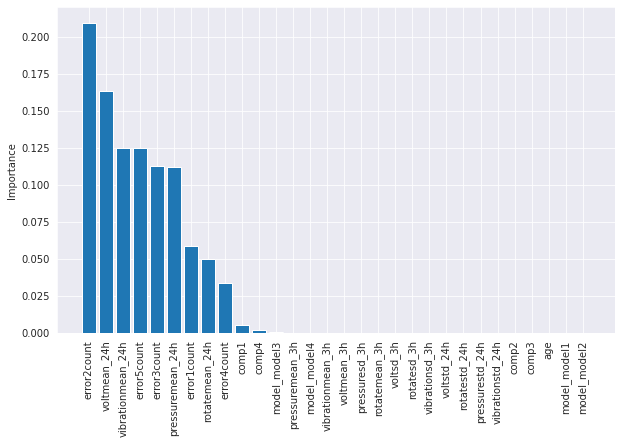

In [ ]:


#test_result.to_csv(r'/content/test_result_dataframe_after.csv')
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=True, key=lambda x: x[1]))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

# Evaluation
In predictive maintenance, machine failures are usually rare occurrences in the lifetime of the assets compared to normal operation. This causes an imbalance in the label distribution which usually causes poor performance as algorithms tend to classify majority class examples better at the expense of minority class examples as the total misclassification error is much improved when majority class is labeled correctly. This causes low recall rates although accuracy can be high and becomes a larger problem when the cost of false alarms to the business is very high. To help with this problem, sampling techniques such as oversampling of the minority examples are usually used along with more sophisticated techniques which are not covered in this notebook.

none     285684
comp2      1985
comp1      1464
comp4      1240
comp3       968
Name: failure, dtype: int64


Text(0, 0.5, 'Count')

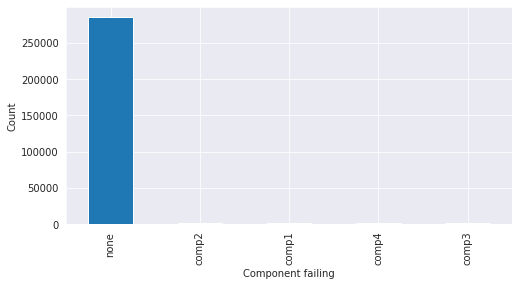

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
print(labeled_features['failure'].value_counts())
labeled_features['failure'].value_counts().plot(kind='bar')
plt.xlabel('Component failing')
plt.ylabel('Count')

Also, due to the class imbalance problem, it is important to look at evaluation metrics other than accuracy alone and compare those metrics to the baseline metrics which are computed when random chance is used to make predictions rather than a machine learning model. The comparison will bring out the value and benefits of using a machine learning model better.

In the following, we use an evaluation function that computes many important evaluation metrics along with baseline metrics for classification problems. For a detailed explanation of the metrics, please refer to the scikit-learn documentation and a companion blog post (with examples in R, not Python),

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(['average accuracy',
                          'micro-averaged precision/recall/F1'])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [ ]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[120276     21      0     13      3]
 [    20    505      4     10      3]
 [     0      0    868      1      0]
 [    13      0      2    373      0]
 [     3      0      7      1    496]]

Split 2:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[95951    12     0    11     3]
 [   21   396     2     0     3]
 [    0     0   708     0     0]
 [   12     1     2   291     0]
 [    2     0     4     1   393]]

Split 3:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[72409     6     0    11     3]
 [   19   298     1     1     1]
 [    0     1   554     0     1]
 [   14     0     0   209     1]
 [    2     1     2     0   275]]


,none,comp1,comp2,comp3,comp4
accuracy,0.999176,0.999176,0.999176,0.999176,0.999176
precision,0.999701,0.960076,0.985244,0.937186,0.988048
recall,0.999692,0.931734,0.998849,0.961340,0.978304
F1,0.999697,0.945693,0.992000,0.949109,0.983152
macro precision,0.974051,0.974051,0.974051,0.974051,0.974051
macro recall,0.973984,0.973984,0.973984,0.973984,0.973984
macro F1,0.973930,0.973930,0.973930,0.973930,0.973930
average accuracy,0.999671,0.999671,0.999671,0.999671,0.999671
micro-averaged precision/recall/F1,0.999176,0.999176,0.999176,0.999176,0.999176
majority class accuracy,0.981194,0.000000,0.000000,0.000000,0.000000
